In [1]:
import pandas as pd
file_path = '../data/owid-covid-data.csv'
df = pd.read_csv(file_path, parse_dates=True)[['date', 'new_deaths']]
df["date"] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df = df.groupby('date').sum().reset_index()
df.set_index('date', inplace=True)

In [2]:
from autots import AutoTS
model = AutoTS(
    forecast_length=15,
    frequency='D',
    prediction_interval=0.95,
    ensemble=None,
    models_mode='gradient_boosting',
    model_list = 'univariate',# or ['ARIMA','ETS']
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list='fast',
    n_jobs='auto')

Using 6 cpus for n_jobs.


In [3]:
from autots.models.model_list import model_lists
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [4]:
print(model_lists['univariate'])

['ARCH', 'LastValueNaive', 'GLS', 'KalmanStateSpace', 'ConstantNaive', 'ARDL', 'NeuralProphet', 'DatepartRegression', 'FBProphet', 'AverageValueNaive', 'SeasonalNaive', 'UnobservedComponents', 'UnivariateMotif', 'Theta', 'ETS', 'MetricMotif', 'ARIMA', 'PreprocessingRegression', 'UnivariateRegression', 'SeasonalityMotif', 'MLEnsemble', 'GLM']


In [4]:
model.fit(df['new_deaths'])
prediction = model.predict(forecast_length=30)

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5
Model Number: 4 with model AverageValueNaive in generation 0 of 5
Model Number: 5 with model DatepartRegression in generation 0 of 5
Model Number: 6 with model DatepartRegression in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is

Model Number: 7 with model DatepartRegression in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

Model Number: 8 with model DatepartRegression in generation 0 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 8 in generation 0: DatepartRegression
Model Number: 9 with model ETS in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\User

Model Number: 10 with model ETS in generation 0 of 5
Model Number: 11 with model GLM in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 12 with model GLM in generation 0 of 5
Model Number: 13 with model GLS in generation 0 of 5
Model Number: 14 with model GLS in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 15 with model LastValueNaive in generation 0 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 15 in generation 0: LastValueNaive
Model Number: 16 with model LastValueNaive in generation 0 of 5
Model Number: 17 with model LastValueNaive in generation 0 of 5
Model Number: 18 with model LastValueNaive in generation 0 of 5
Model Number: 19 with model SeasonalNaive in generation 0 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 19 in generation 0: SeasonalNaive
Model Number: 20 with model SeasonalNaive in generation 0 of 5
Model Number: 21 with model SeasonalNaive in generation 0 of 5
Model Number: 22 with model UnobservedComponents in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

Model Number: 23 with model UnobservedComponents in generation 0 of 5
Model Number: 24 with model UnobservedComponents in generation 0 of 5
Model Number: 25 with model ConstantNaive in generation 0 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 25 in generation 0: ConstantNaive
Model Number: 26 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 26 in generation 0: FBProphet
Model Number: 27 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 29 with model DatepartRegression in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 30 with model UnobservedComponents in generation 0 of 5
Model Number: 31 with model UnobservedComponents in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 32 with model ETS in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 33 with model ARDL in generation 0 of 5
Model Number: 34 with model UnivariateMotif in generation 0 of 5
Model Number: 35 with model UnivariateMotif in generation 0 of 5
Model Number: 36 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 36 in generation 0: FBProphet
Model Number: 37 with model SeasonalNaive in generation 0 of 5
Model Number: 38 with model DatepartRegression in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fu

Model Number: 39 with model Theta in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 40 with model UnivariateRegression in generation 0 of 5
Model Number: 41 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 41 in generation 0: ARCH
Model Number: 42 with model SeasonalityMotif in generation 0 of 5
Model Number: 43 with model GLM in generation 0 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 43 in generation 0: GLM
Model Number: 44 with model KalmanStateSpace in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

Model Number: 45 with model MLEnsemble in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 45 in generation 0: MLEnsemble
Model Number: 46 with model SeasonalNaive in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 47 with model ARDL in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 47 in generation 0: ARDL
Model Number: 48 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 48 in generation 0: DatepartRegression
Model Number: 49 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 49 in generation 0: NeuralProphet
Model Number: 50 with model SeasonalityMotif in generation 0 of 5
Model Number: 51 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 51 in generation 0: ARCH
Model Number: 52 with model ETS in generation 0 of 5
Model Number: 53 with model UnivariateRegression in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Template Eval Error: ValueError('Loss squared_error is not supported for HistGradientBoostingRegressor. Accepted losses: least_squares, least_absolute_deviation, poisson.') in model 53 in generation 0: UnivariateRegression
Model Number: 54 with model UnivariateMotif in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 55 with model MetricMotif in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 55 in generation 0: MetricMotif
Model Number: 56 with model AverageValueNaive in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 57 with model Theta in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 58 with model LastValueNaive in generation 0 of 5
Model Number: 59 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 59 in generation 0: FBProphet
Model Number: 60 with model UnobservedComponents in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 60 in generation 0: UnobservedComponents
Model Number: 61 with model ARIMA in generation 0 of 5
Model Number: 62 with model GLS in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.group

Model Number: 63 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError('Loss squared_error is not supported for HistGradientBoostingRegressor. Accepted losses: least_squares, least_absolute_deviation, poisson.') in model 63 in generation 0: PreprocessingRegression
Model Number: 64 with model ConstantNaive in generation 0 of 5
Model Number: 65 with model DatepartRegression in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: Futu

Model Number: 66 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError('Loss squared_error is not supported for HistGradientBoostingRegressor. Accepted losses: least_squares, least_absolute_deviation, poisson.') in model 66 in generation 0: PreprocessingRegression
Model Number: 67 with model ETS in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 67 in generation 0: ETS
Model Number: 68 with model MLEnsemble in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 68 in generation 0: MLEnsemble
Model Number: 69 with model GLM in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 69 in generation 0: GLM
Model Number: 70 with model GLS in generation 0 of 5
Model Number: 71 with model UnivariateMotif in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 72 with model Theta in generation 0 of 5
Model Number: 73 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 73 in generation 0: ARCH
Model Number: 74 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 74 in generation 0: NeuralProphet
Model Number: 75 with model UnobservedComponents in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 75 in generation 0: UnobservedComponents
Model Number: 76 with model ConstantNaive in generation 0 of 5
Model Number: 77 with model GLM in generation 0 of 5
Model Number: 78 with model Theta in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

Model Number: 79 with model UnivariateMotif in generation 0 of 5
Model Number: 80 with model ARIMA in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 81 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 81 in generation 0: FBProphet
Model Number: 82 with model UnobservedComponents in generation 0 of 5
Model Number: 83 with model GLM in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 83 in generation 0: GLM
Model Number: 84 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 84 in generation 0: ARDL
Model Number: 85 with model GLS in generation 0 of 5
Model Number: 86 with model LastValueNaive in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is

Model Number: 87 with model ARDL in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:53

Model Number: 88 with model KalmanStateSpace in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 89 with model LastValueNaive in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 89 in generation 0: LastValueNaive
Model Number: 90 with model ConstantNaive in generation 0 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 90 in generation 0: ConstantNaive
Model Number: 91 with model ETS in generation 0 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 91 in generation 0: ETS
Model Number: 92 with model UnivariateRegression in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 93 with model AverageValueNaive in generation 0 of 5
Model Number: 94 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 94 in generation 0: NeuralProphet
Model Number: 95 with model MetricMotif in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 95 in generation 0: MetricMotif
Model Number: 96 with model MetricMotif in generation 0 of 5
Model Number: 97 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 97 in generation 0: PreprocessingRegression
Model Number: 98 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 98 in generation 0: ARCH
Model Number: 99 with model SeasonalityMotif in generation 0 of 5
Model Number: 100 with model GLS in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'meth

Model Number: 101 with model UnobservedComponents in generation 0 of 5
Model Number: 102 with model KalmanStateSpace in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 103 with model KalmanStateSpace in generation 0 of 5
Model Number: 104 with model LastValueNaive in generation 0 of 5
Model Number: 105 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 105 in generation 0: MLEnsemble
Model Number: 106 with model GLS in generation 0 of 5
Model Number: 107 with model SeasonalityMotif in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 108 with model ARIMA in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 108 in generation 0: ARIMA
Model Number: 109 with model UnivariateMotif in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 110 with model ARIMA in generation 0 of 5
Model Number: 111 with model LastValueNaive in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 112 with model PreprocessingRegression in generation 0 of 5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] No furt

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed

Model Number: 115 with model UnivariateMotif in generation 0 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 115 in generation 0: UnivariateMotif
Model Number: 116 with model ETS in generation 0 of 5
Model Number: 117 with model GLS in generation 0 of 5
Model Number: 118 with model SeasonalNaive in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 119 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 119 in generation 0: ARCH
Model Number: 120 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 120 in generation 0: MLEnsemble
Model Number: 121 with model ETS in generation 0 of 5
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on new_deaths with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'MaxAbsScaler', '2': 'Round', '3': 'Detrend'}, 'transformation_para

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 4 has size 2') in model 122 in generation 0: PreprocessingRegression
Model Number: 123 with model DatepartRegression in generation 0 of 5
Model Number: 124 with model MLEnsemble in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 124 in generation 0: MLEnsemble
Model Number: 125 with model UnivariateMotif in generation 0 of 5
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 125 in generation 0: UnivariateMotif
Model Number: 126 with model AverageValueNaive in generation 0 of 5
Model Number: 127 with model MetricMotif in generation 0 of 5
Model Number: 128 with model ETS in generation 0 of 5
Model Number: 129 with model LastValueNaive in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 130 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 130 in generation 0: FBProphet
Model Number: 131 with model ETS in generation 0 of 5
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on new_deaths with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 132 with model UnivariateMotif in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 132 in generation 0: UnivariateMotif
Model Number: 133 with model GLM in generation 0 of 5
Model Number: 134 with model DatepartRegression in generation 0 of 5
Model Number: 135 with model MLEnsemble in generation 0 of 5

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWar


Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 135 in generation 0: MLEnsemble
Model Number: 136 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 136 in generation 0: UnivariateRegression
Model Number: 137 with model UnivariateMotif in generation 0 of 5
Model Number: 138 with model MetricMotif in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 139 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 139 in generation 0: ARDL
Model Number: 140 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 140 in generation 0: FBProphet
Model Number: 141 with model ARDL in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 142 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 142 in generation 0: PreprocessingRegression
Model Number: 143 with model ConstantNaive in generation 0 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'KNNImputer', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'RollingMean100thN', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {}, '3': {'rows': 7, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 143 in generation 0: ConstantNaive
Model Number: 144 with model SeasonalNaive in generation 0 of 5
Model Number: 145 with model DatepartRegression in generation 0 of 5
Template Eval Error: Val

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\basics.py:440: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\basics.py:453: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_2 = df.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a futur

Model Number: 149 with model Theta in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 150 with model ConstantNaive in generation 0 of 5
Model Number: 151 with model GLM in generation 0 of 5
Model Number: 152 with model GLS in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: F

New Generation: 1 of 5
Model Number: 153 with model SeasonalityMotif in generation 1 of 5
Model Number: 154 with model Theta in generation 1 of 5
Model Number: 155 with model ETS in generation 1 of 5
Model Number: 156 with model ETS in generation 1 of 5
Model Number: 157 with model LastValueNaive in generation 1 of 5
Model Number: 158 with model MetricMotif in generation 1 of 5
Model Number: 159 with model Theta in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Template Eval Error: Exception('Transformer PCA failed on inverse') in model 159 in generation 1: Theta
Model Number: 160 with model GLS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 161 with model LastValueNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 162 with model SeasonalNaive in generation 1 of 5
Model Number: 163 with model AverageValueNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 164 with model UnivariateMotif in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 165 with model KalmanStateSpace in generation 1 of 5
Model Number: 166 with model Theta in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 167 with model SeasonalityMotif in generation 1 of 5
Model Number: 168 with model UnivariateMotif in generation 1 of 5
Model Number: 169 with model UnivariateMotif in generation 1 of 5
Model Number: 170 with model ETS in generation 1 of 5
Model Number: 171 with model ETS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

Model Number: 172 with model ARDL in generation 1 of 5
Model Number: 173 with model ETS in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 173 in generation 1: ETS
Model Number: 174 with model LastValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 174 in generation 1: LastValueNaive
Model Number: 175 with model SeasonalNaive in generation 1 of 5
Model Number: 176 with model ETS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 177 with model UnivariateRegression in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 178 with model SeasonalNaive in generation 1 of 5
Model Number: 179 with model LastValueNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecate

Model Number: 180 with model LastValueNaive in generation 1 of 5
Model Number: 181 with model GLM in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse

Model Number: 182 with model Theta in generation 1 of 5
Model Number: 183 with model UnobservedComponents in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 183 in generation 1: UnobservedComponents
Model Number: 184 with model GLM in generation 1 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 184 in generation 1: GLM
Model Number: 185 with model UnivariateMotif in generation 1 of 5
Model Number: 186 with model GLS in generation 1 of 5
Model Number: 187 with model ConstantNaive in generation 1 of 5
Model Number: 188 with model DatepartRegression in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:813: RuntimeWarning: divide by zero encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
c:\Users\ambro\AppData\Local\Programs\Python\Python39\li

Epoch 1/50
135/135 [==============================] - 5s 21ms/step - loss: nan - val_loss: nan
Epoch 2/50
135/135 [==============================] - 2s 18ms/step - loss: nan - val_loss: nan
Epoch 3/50
135/135 [==============================] - 2s 18ms/step - loss: nan - val_loss: nan
Epoch 4/50
135/135 [==============================] - 2s 18ms/step - loss: nan - val_loss: nan
Epoch 5/50
135/135 [==============================] - 3s 19ms/step - loss: nan - val_loss: nan
Epoch 6/50
135/135 [==============================] - 2s 18ms/step - loss: nan - val_loss: nan
Epoch 7/50
135/135 [==============================] - 2s 18ms/step - loss: nan - val_loss: nan
Epoch 8/50
135/135 [==============================] - 2s 18ms/step - loss: nan - val_loss: nan
Epoch 9/50
135/135 [==============================] - 2s 18ms/step - loss: nan - val_loss: nan
Epoch 10/50
135/135 [==============================] - 2s 18ms/step - loss: nan - val_loss: nan
Template Eval Error: ValueError('Model DatepartRe

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Futur

Model Number: 193 with model ConstantNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 193 in generation 1: ConstantNaive
Model Number: 194 with model ETS in generation 1 of 5
Model Number: 195 with model ETS in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 195 in generation 1: ETS
Model Number: 196 with model GLS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1448: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:5

Model Number: 197 with model UnivariateMotif in generation 1 of 5
Model Number: 198 with model DatepartRegression in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a

Model Number: 199 with model SeasonalityMotif in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 200 with model Theta in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Template Eval Error: Exception('Transformer PCA failed on inverse') in model 200 in generation 1: Theta
Model Number: 201 with model ARIMA in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


Model Number: 202 with model SeasonalNaive in generation 1 of 5
Model Number: 203 with model LastValueNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 204 with model KalmanStateSpace in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 205 with model ARIMA in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 205 in generation 1: ARIMA
Model Number: 206 with model SeasonalNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 207 with model LastValueNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 208 with model KalmanStateSpace in generation 1 of 5
Model Number: 209 with model DatepartRegression in generation 1 of 5
Model Number: 210 with model ConstantNaive in generation 1 of 5
Model Number: 211 with model AverageValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 211 in generation 1: AverageValueNaive
Model Number: 212 with model SeasonalNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 213 with model UnivariateMotif in generation 1 of 5
Model Number: 214 with model GLS in generation 1 of 5
Model Number: 215 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 215 in generation 1: UnobservedComponents
Model Number: 216 with model LastValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 216 in generation 1: LastValueNaive
Model Number: 217 with model LastValueNaive in generation 1 of 5
Model Number: 218 with model ARDL in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 218 in generation 1: ARDL
Model Number: 219 with model KalmanStateSpace in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 220 with model UnobservedComponents in generation 1 of 5
Model Number: 221 with model GLM in generation 1 of 5
Model Number: 222 with model ConstantNaive in generation 1 of 5
Model Number: 223 with model LastValueNaive in generation 1 of 5
Model Number: 224 with model KalmanStateSpace in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePo

Model Number: 225 with model SeasonalNaive in generation 1 of 5
Model Number: 226 with model SeasonalityMotif in generation 1 of 5
Model Number: 227 with model GLM in generation 1 of 5
Model Number: 228 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 228 in generation 1: UnobservedComponents
Model Number: 229 with model MetricMotif in generation 1 of 5
Model Number: 230 with model AverageValueNaive in generation 1 of 5
Model Number: 231 with model Theta in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecate

Model Number: 232 with model UnivariateMotif in generation 1 of 5
Model Number: 233 with model UnobservedComponents in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 234 with model AverageValueNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 235 with model ARIMA in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1448: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.p

Model Number: 236 with model KalmanStateSpace in generation 1 of 5
Model Number: 237 with model SeasonalityMotif in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 238 with model KalmanStateSpace in generation 1 of 5
Model Number: 239 with model LastValueNaive in generation 1 of 5
Model Number: 240 with model SeasonalityMotif in generation 1 of 5
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 240 in generation 1: SeasonalityMotif
Model Number: 241 with model UnivariateMotif in generation 1 of 5
Model Number: 242 with model UnivariateMotif in generation 1 of 5
Model Number: 243 with model UnivariateMotif in generation 1 of 5
Model Number: 244 with model GLS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

Model Number: 245 with model ARIMA in generation 1 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 245 in generation 1: ARIMA
Model Number: 246 with model ETS in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 246 in generation 1: ETS
Model Number: 247 with model SeasonalNaive in generation 1 of 5
Model Number: 248 with model KalmanStateSpace in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 249 with model ETS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 250 with model DatepartRegression in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 250 in generation 1: DatepartRegression
Model Number: 251 with model SeasonalNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 252 with model GLS in generation 1 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 252 in generation 1: GLS
Model Number: 253 with model Theta in generation 1 of 5
Model Number: 254 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 254 in generation 1: UnobservedComponents
Model Number: 255 with model LastValueNaive in generation 1 of 5
Model Number: 256 with model AverageValueNaive in generation 1 of 5
Model Number: 257 with model ARIMA in generation 1 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 257 in generation 1: ARIMA
Model Number: 258 with model SeasonalityMotif in generation 1 of 5
Model Number: 259 with model KalmanStateSpace in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'meth

Model Number: 260 with model UnivariateMotif in generation 1 of 5
Model Number: 261 with model ETS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 262 with model ARDL in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

New Generation: 2 of 5
Model Number: 263 with model ARIMA in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'meth

Model Number: 264 with model ARIMA in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 264 in generation 2: ARIMA
Model Number: 265 with model SeasonalityMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 266 with model SeasonalityMotif in generation 2 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'AlignLastValue', '1': 'MinMaxScaler', '2': 'KalmanSmoothing', '3': 'Round'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1,

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 268 with model Theta in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 269 with model GLM in generation 2 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 269 in generation 2: GLM
Model Number: 270 with model UnivariateMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 271 with model ETS in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 271 in generation 2: ETS
Model Number: 272 with model ETS in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 273 with model LastValueNaive in generation 2 of 5
Model Number: 274 with model ConstantNaive in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\auto

Model Number: 275 with model ARIMA in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 276 with model KalmanStateSpace in generation 2 of 5
Model Number: 277 with model UnivariateMotif in generation 2 of 5
Model Number: 278 with model Theta in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:422: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse i

Model Number: 279 with model MetricMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 280 with model KalmanStateSpace in generation 2 of 5
Model Number: 281 with model ETS in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 282 with model KalmanStateSpace in generation 2 of 5
Model Number: 283 with model LastValueNaive in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 284 with model AverageValueNaive in generation 2 of 5
Model Number: 285 with model DatepartRegression in generation 2 of 5
Model Number: 286 with model ETS in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.group

Model Number: 287 with model MetricMotif in generation 2 of 5
Model Number: 288 with model ETS in generation 2 of 5
Model Number: 289 with model MetricMotif in generation 2 of 5
Model Number: 290 with model ARIMA in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 291 with model MetricMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 292 with model GLS in generation 2 of 5
Model Number: 293 with model LastValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 293 in generation 2: LastValueNaive
Model Number: 294 with model UnivariateMotif in generation 2 of 5
Model Number: 295 with model ConstantNaive in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 296 with model UnobservedComponents in generation 2 of 5
Model Number: 297 with model AverageValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 297 in generation 2: AverageValueNaive
Model Number: 298 with model MetricMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 299 with model GLS in generation 2 of 5
Model Number: 300 with model GLM in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 301 with model AverageValueNaive in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:2407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - self.means.shift(self.lag).values[..., None]).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\skl

Model Number: 302 with model KalmanStateSpace in generation 2 of 5
Model Number: 303 with model Theta in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 304 with model ConstantNaive in generation 2 of 5
Model Number: 305 with model AverageValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 305 in generation 2: AverageValueNaive
Model Number: 306 with model UnobservedComponents in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

Model Number: 307 with model UnivariateMotif in generation 2 of 5
Model Number: 308 with model SeasonalNaive in generation 2 of 5
Model Number: 309 with model MetricMotif in generation 2 of 5
Model Number: 310 with model SeasonalityMotif in generation 2 of 5
Model Number: 311 with model SeasonalityMotif in generation 2 of 5
Model Number: 312 with model SeasonalNaive in generation 2 of 5
Model Number: 313 with model AverageValueNaive in generation 2 of 5
Model Number: 314 with model GLS in generation 2 of 5
Model Number: 315 with model GLS in generation 2 of 5
Model Number: 316 with model SeasonalityMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 317 with model SeasonalNaive in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Template Eval Error: Exception('Transformer Detrend failed on fit') in model 317 in generation 2: SeasonalNaive
Model Number: 318 with model SeasonalityMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 319 with model KalmanStateSpace in generation 2 of 5
Model Number: 320 with model Theta in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 321 with model ETS in generation 2 of 5
Model Number: 322 with model UnobservedComponents in generation 2 of 5
Model Number: 323 with model GLS in generation 2 of 5
Model Number: 324 with model AverageValueNaive in generation 2 of 5
Model Number: 325 with model GLS in generation 2 of 5
Model Number: 326 with model DatepartRegression in generation 2 of 5
Model Number: 327 with model UnivariateMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\auto

Model Number: 328 with model AverageValueNaive in generation 2 of 5
Model Number: 329 with model SeasonalNaive in generation 2 of 5
Model Number: 330 with model ConstantNaive in generation 2 of 5
Model Number: 331 with model SeasonalityMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1448: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages

Model Number: 332 with model SeasonalityMotif in generation 2 of 5
Model Number: 333 with model Theta in generation 2 of 5
Model Number: 334 with model LastValueNaive in generation 2 of 5
Model Number: 335 with model LastValueNaive in generation 2 of 5
Model Number: 336 with model ARIMA in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 336 in generation 2: ARIMA
Model Number: 337 with model AverageValueNaive in generation 2 of 5
Model Number: 338 with model ETS in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 339 with model KalmanStateSpace in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 340 with model LastValueNaive in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 341 with model LastValueNaive in generation 2 of 5
Model Number: 342 with model SeasonalityMotif in generation 2 of 5
Model Number: 343 with model SeasonalityMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.group

Model Number: 344 with model KalmanStateSpace in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 345 with model ConstantNaive in generation 2 of 5
Model Number: 346 with model KalmanStateSpace in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

Model Number: 347 with model Theta in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Model Number: 348 with model ARIMA in generation 2 of 5
Model Number: 349 with model ARIMA in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

Model Number: 350 with model ETS in generation 2 of 5
Model Number: 351 with model Theta in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 352 with model UnivariateMotif in generation 2 of 5
Model Number: 353 with model GLS in generation 2 of 5
Model Number: 354 with model ETS in generation 2 of 5
Model Number: 355 with model UnivariateMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 356 with model ARDL in generation 2 of 5
Model Number: 357 with model UnivariateMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 358 with model Theta in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 

Model Number: 359 with model AverageValueNaive in generation 2 of 5
Model Number: 360 with model GLS in generation 2 of 5
Model Number: 361 with model SeasonalityMotif in generation 2 of 5
Model Number: 362 with model GLM in generation 2 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 362 in generation 2: GLM
Model Number: 363 with model LastValueNaive in generation 2 of 5
Model Number: 364 with model GLS in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

Model Number: 365 with model ETS in generation 2 of 5
Model Number: 366 with model ConstantNaive in generation 2 of 5
Model Number: 367 with model UnivariateMotif in generation 2 of 5
Model Number: 368 with model ConstantNaive in generation 2 of 5
Model Number: 369 with model SeasonalityMotif in generation 2 of 5
Model Number: 370 with model ETS in generation 2 of 5
Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 370 in generation 2: ETS
Model Number: 371 with model GLS in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 372 with model ARIMA in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

New Generation: 3 of 5
Model Number: 373 with model ETS in generation 3 of 5
Model Number: 374 with model ETS in generation 3 of 5
Model Number: 375 with model AverageValueNaive in generation 3 of 5
Model Number: 376 with model LastValueNaive in generation 3 of 5
Model Number: 377 with model UnivariateMotif in generation 3 of 5
Model Number: 378 with model ETS in generation 3 of 5
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

Model Number: 379 with model GLS in generation 3 of 5
Model Number: 380 with model MetricMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

Model Number: 381 with model ARIMA in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 381 in generation 3: ARIMA
Model Number: 382 with model MetricMotif in generation 3 of 5
Model Number: 383 with model DatepartRegression in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 384 with model GLS in generation 3 of 5
Model Number: 385 with model SeasonalityMotif in generation 3 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 385 in generation 3: SeasonalityMotif
Model Number: 386 with model AverageValueNaive in generation 3 of 5
Model Number: 387 with model SeasonalNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1448: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:5

Model Number: 388 with model MetricMotif in generation 3 of 5
Model Number: 389 with model ETS in generation 3 of 5
Model Number: 390 with model SeasonalNaive in generation 3 of 5
Model Number: 391 with model ETS in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'met

Model Number: 392 with model UnivariateMotif in generation 3 of 5
Model Number: 393 with model ConstantNaive in generation 3 of 5
Model Number: 394 with model SeasonalityMotif in generation 3 of 5
Model Number: 395 with model GLS in generation 3 of 5
Model Number: 396 with model DatepartRegression in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

Epoch 1/50
169/169 [==============================] - 4s 2ms/step - loss: 15138.8115
Epoch 2/50
169/169 [==============================] - 0s 3ms/step - loss: 15138.7314
Epoch 3/50
169/169 [==============================] - 0s 2ms/step - loss: 15138.5703
Epoch 4/50
169/169 [==============================] - 0s 3ms/step - loss: 15138.4414
Epoch 5/50
169/169 [==============================] - 0s 3ms/step - loss: 15138.2900
Epoch 6/50
169/169 [==============================] - 0s 3ms/step - loss: 15138.2471
Epoch 7/50
169/169 [==============================] - 0s 3ms/step - loss: 15138.1777
Epoch 8/50
169/169 [==============================] - 0s 2ms/step - loss: 15138.0977
Epoch 9/50
169/169 [==============================] - 0s 2ms/step - loss: 15138.0459
Epoch 10/50
169/169 [==============================] - 0s 3ms/step - loss: 15137.9912
Epoch 11/50
169/169 [==============================] - 0s 3ms/step - loss: 15137.9492
Epoch 12/50
169/169 [==============================] - 0s 3ms/s

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 401 with model AverageValueNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 402 with model AverageValueNaive in generation 3 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 402 in generation 3: AverageValueNaive
Model Number: 403 with model UnobservedComponents in generation 3 of 5
Model Number: 404 with model MetricMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 405 with model SeasonalityMotif in generation 3 of 5
Model Number: 406 with model LastValueNaive in generation 3 of 5
Model Number: 407 with model AverageValueNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 408 with model GLS in generation 3 of 5
Model Number: 409 with model UnivariateMotif in generation 3 of 5
Model Number: 410 with model GLS in generation 3 of 5
Model Number: 411 with model ConstantNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

Model Number: 412 with model ARIMA in generation 3 of 5
Model Number: 413 with model ARDL in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 413 in generation 3: ARDL
Model Number: 414 with model SeasonalityMotif in generation 3 of 5
Model Number: 415 with model ETS in generation 3 of 5
Model Number: 416 with model ConstantNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Model Number: 417 with model MetricMotif in generation 3 of 5
Model Number: 418 with model MetricMotif in generation 3 of 5
Model Number: 419 with model MetricMotif in generation 3 of 5
Model Number: 420 with model ConstantNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: Futur

Model Number: 421 with model Theta in generation 3 of 5
Model Number: 422 with model AverageValueNaive in generation 3 of 5
Model Number: 423 with model Theta in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 424 with model ConstantNaive in generation 3 of 5
Model Number: 425 with model KalmanStateSpace in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

Model Number: 426 with model GLM in generation 3 of 5
Model Number: 427 with model UnobservedComponents in generation 3 of 5
Model Number: 428 with model Theta in generation 3 of 5
Model Number: 429 with model UnivariateMotif in generation 3 of 5
Model Number: 430 with model SeasonalityMotif in generation 3 of 5
Model Number: 431 with model SeasonalityMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Model Number: 432 with model AverageValueNaive in generation 3 of 5
Model Number: 433 with model UnivariateMotif in generation 3 of 5
Model Number: 434 with model KalmanStateSpace in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 435 with model LastValueNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 436 with model UnivariateMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future 

Model Number: 437 with model SeasonalityMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:2407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - self.means.shift(self.lag).values[..., None]).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: Fut

Model Number: 438 with model ARIMA in generation 3 of 5
Model Number: 439 with model GLS in generation 3 of 5
Model Number: 440 with model MetricMotif in generation 3 of 5
Model Number: 441 with model AverageValueNaive in generation 3 of 5
Model Number: 442 with model KalmanStateSpace in generation 3 of 5
Model Number: 443 with model UnivariateMotif in generation 3 of 5
Model Number: 444 with model MetricMotif in generation 3 of 5
Model Number: 445 with model GLM in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

Model Number: 446 with model LastValueNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 447 with model ETS in generation 3 of 5
Model Number: 448 with model UnivariateMotif in generation 3 of 5
Model Number: 449 with model LastValueNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.group

Model Number: 450 with model KalmanStateSpace in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 451 with model GLM in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 452 with model KalmanStateSpace in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 453 with model UnivariateMotif in generation 3 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 453 in generation 3: UnivariateMotif
Model Number: 454 with model ARIMA in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 455 with model ConstantNaive in generation 3 of 5
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 455 in generation 3: ConstantNaive
Model Number: 456 with model GLS in generation 3 of 5
Model Number: 457 with model SeasonalityMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprec

Model Number: 458 with model ConstantNaive in generation 3 of 5
Model Number: 459 with model SeasonalNaive in generation 3 of 5
Model Number: 460 with model SeasonalityMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

Model Number: 461 with model DatepartRegression in generation 3 of 5
Model Number: 462 with model SeasonalNaive in generation 3 of 5
Model Number: 463 with model UnobservedComponents in generation 3 of 5
Model Number: 464 with model UnivariateMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be

Model Number: 465 with model LastValueNaive in generation 3 of 5
Model Number: 466 with model MetricMotif in generation 3 of 5
Model Number: 467 with model KalmanStateSpace in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: overflow encoun

Model Number: 468 with model ConstantNaive in generation 3 of 5
Model Number: 469 with model ETS in generation 3 of 5
Model Number: 470 with model GLS in generation 3 of 5
Model Number: 471 with model ARIMA in generation 3 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 471 in generation 3: ARIMA
Model Number: 472 with model MetricMotif in generation 3 of 5
Model Number: 473 with model KalmanStateSpace in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and wi

Model Number: 474 with model ARIMA in generation 3 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 474 in generation 3: ARIMA
Model Number: 475 with model AverageValueNaive in generation 3 of 5
Model Number: 476 with model ConstantNaive in generation 3 of 5
Model Number: 477 with model GLM in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and wil

Model Number: 478 with model LastValueNaive in generation 3 of 5
Model Number: 479 with model UnivariateMotif in generation 3 of 5
Model Number: 480 with model Theta in generation 3 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 480 in generation 3: Theta
Model Number: 481 with model UnivariateMotif in generation 3 of 5
Model Number: 482 with model MetricMotif in generation 3 of 5
New Generation: 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 483 with model ConstantNaive in generation 4 of 5
Model Number: 484 with model UnivariateMotif in generation 4 of 5
Model Number: 485 with model SeasonalityMotif in generation 4 of 5
Model Number: 486 with model KalmanStateSpace in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 487 with model KalmanStateSpace in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1448: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:5

Model Number: 488 with model Theta in generation 4 of 5
Model Number: 489 with model AverageValueNaive in generation 4 of 5
Model Number: 490 with model SeasonalityMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 490 in generation 4: SeasonalityMotif
Model Number: 491 with model MetricMotif in generation 4 of 5
Model Number: 492 with model UnivariateMotif in generation 4 of 5
Model Number: 493 with model ETS in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

Model Number: 494 with model MetricMotif in generation 4 of 5
Model Number: 495 with model UnivariateMotif in generation 4 of 5
Model Number: 496 with model SeasonalityMotif in generation 4 of 5
Model Number: 497 with model LastValueNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 498 with model GLS in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will rais

Model Number: 499 with model ConstantNaive in generation 4 of 5
Model Number: 500 with model AverageValueNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 501 with model GLM in generation 4 of 5
Model Number: 502 with model AverageValueNaive in generation 4 of 5
Model Number: 503 with model GLS in generation 4 of 5
Model Number: 504 with model GLS in generation 4 of 5
Model Number: 505 with model SeasonalityMotif in generation 4 of 5
Model Number: 506 with model AverageValueNaive in generation 4 of 5
Model Number: 507 with model SeasonalityMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 508 with model MetricMotif in generation 4 of 5
Model Number: 509 with model LastValueNaive in generation 4 of 5
Model Number: 510 with model ConstantNaive in generation 4 of 5
Model Number: 511 with model UnivariateMotif in generation 4 of 5
Model Number: 512 with model ConstantNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: Da

Model Number: 513 with model MetricMotif in generation 4 of 5
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 513 in generation 4: MetricMotif
Model Number: 514 with model UnobservedComponents in generation 4 of 5
Model Number: 515 with model UnivariateMotif in generation 4 of 5
Model Number: 516 with model MetricMotif in generation 4 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 516 in generation 4: MetricMotif
Model Number: 517 with model Theta in generation 4 of 5
Model Number: 518 with model GLM in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 519 with model UnivariateMotif in generation 4 of 5

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 519 in generation 4: UnivariateMotif
Model Number: 520 with model Theta in generation 4 of 5
Model Number: 521 with model KalmanStateSpace in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 522 with model KalmanStateSpace in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 523 with model ETS in generation 4 of 5
Model Number: 524 with model ETS in generation 4 of 5
Model Number: 525 with model AverageValueNaive in generation 4 of 5
Model Number: 526 with model KalmanStateSpace in generation 4 of 5
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 526 in generation 4: KalmanStateSpace
Model Number: 527 with model UnivariateMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 528 with model KalmanStateSpace in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 529 with model ETS in generation 4 of 5
Model Number: 530 with model UnivariateMotif in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 530 in generation 4: UnivariateMotif
Model Number: 531 with model MetricMotif in generation 4 of 5
Model Number: 532 with model SeasonalNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 533 with model ETS in generation 4 of 5
Model Number: 534 with model LastValueNaive in generation 4 of 5
Model Number: 535 with model ETS in generation 4 of 5
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on new_deaths with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 535 in generation 4: ETS
Model Number: 536 with model KalmanStateSpace in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 537 with model SeasonalityMotif in generation 4 of 5
Model Number: 538 with model UnivariateMotif in generation 4 of 5
Model Number: 539 with model ConstantNaive in generation 4 of 5
Model Number: 540 with model ConstantNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 541 with model ARIMA in generation 4 of 5
Model Number: 542 with model LastValueNaive in generation 4 of 5
Model Number: 543 with model UnivariateMotif in generation 4 of 5
Model Number: 544 with model MetricMotif in generation 4 of 5
Model Number: 545 with model SeasonalNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Model Number: 546 with model MetricMotif in generation 4 of 5
Model Number: 547 with model LastValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 547 in generation 4: LastValueNaive
Model Number: 548 with model GLS in generation 4 of 5
Model Number: 549 with model SeasonalityMotif in generation 4 of 5
Model Number: 550 with model ARIMA in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\auto

Model Number: 551 with model AverageValueNaive in generation 4 of 5
Model Number: 552 with model ARDL in generation 4 of 5
Model Number: 553 with model DatepartRegression in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 554 with model SeasonalityMotif in generation 4 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 554 in generation 4: SeasonalityMotif
Model Number: 555 with model AverageValueNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 556 with model ARIMA in generation 4 of 5
Model Number: 557 with model Theta in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 558 with model SeasonalityMotif in generation 4 of 5
Model Number: 559 with model GLS in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will rais

Model Number: 560 with model GLM in generation 4 of 5
Model Number: 561 with model GLS in generation 4 of 5
Model Number: 562 with model ETS in generation 4 of 5
Model Number: 563 with model AverageValueNaive in generation 4 of 5
Model Number: 564 with model GLM in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 565 with model MetricMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 566 with model SeasonalityMotif in generation 4 of 5
Model Number: 567 with model UnivariateMotif in generation 4 of 5
Model Number: 568 with model AverageValueNaive in generation 4 of 5
Model Number: 569 with model SeasonalNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

Model Number: 570 with model Theta in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 570 in generation 4: Theta
Model Number: 571 with model ARIMA in generation 4 of 5
Model Number: 572 with model Theta in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 573 with model ARIMA in generation 4 of 5
Model Number: 574 with model ConstantNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 575 with model LastValueNaive in generation 4 of 5
Model Number: 576 with model GLS in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated 

Model Number: 577 with model Theta in generation 4 of 5
Model Number: 578 with model Theta in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 579 with model SeasonalityMotif in generation 4 of 5
Model Number: 580 with model Theta in generation 4 of 5
Model Number: 581 with model LastValueNaive in generation 4 of 5
Model Number: 582 with model MetricMotif in generation 4 of 5
Model Number: 583 with model SeasonalityMotif in generation 4 of 5
Model Number: 584 with model AverageValueNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

Model Number: 585 with model GLS in generation 4 of 5
Model Number: 586 with model LastValueNaive in generation 4 of 5
Model Number: 587 with model ConstantNaive in generation 4 of 5
Model Number: 588 with model GLS in generation 4 of 5
Model Number: 589 with model AverageValueNaive in generation 4 of 5
Model Number: 590 with model ETS in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 591 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 591 in generation 4: DatepartRegression
Model Number: 592 with model AverageValueNaive in generation 4 of 5
New Generation: 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 593 with model GLS in generation 5 of 5
Model Number: 594 with model KalmanStateSpace in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 595 with model ARIMA in generation 5 of 5
Model Number: 596 with model UnivariateMotif in generation 5 of 5
Model Number: 597 with model SeasonalityMotif in generation 5 of 5
Model Number: 598 with model LastValueNaive in generation 5 of 5
Model Number: 599 with model AverageValueNaive in generation 5 of 5
Model Number: 600 with model Theta in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 601 with model UnivariateMotif in generation 5 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 601 in generation 5: UnivariateMotif
Model Number: 602 with model ARIMA in generation 5 of 5
Model Number: 603 with model GLM in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encou

Model Number: 604 with model GLS in generation 5 of 5
Model Number: 605 with model GLS in generation 5 of 5
Model Number: 606 with model UnivariateMotif in generation 5 of 5
Model Number: 607 with model ConstantNaive in generation 5 of 5
Model Number: 608 with model KalmanStateSpace in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 609 with model MetricMotif in generation 5 of 5
Model Number: 610 with model MetricMotif in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 610 in generation 5: MetricMotif
Model Number: 611 with model SeasonalityMotif in generation 5 of 5
Model Number: 612 with model SeasonalityMotif in generation 5 of 5
Model Number: 613 with model SeasonalityMotif in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

Model Number: 614 with model ConstantNaive in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 615 with model MetricMotif in generation 5 of 5
Model Number: 616 with model GLS in generation 5 of 5
Model Number: 617 with model GLS in generation 5 of 5
Model Number: 618 with model LastValueNaive in generation 5 of 5
Model Number: 619 with model LastValueNaive in generation 5 of 5
Model Number: 620 with model SeasonalityMotif in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: T

Model Number: 621 with model ConstantNaive in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 622 with model Theta in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will rais

Model Number: 623 with model KalmanStateSpace in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 624 with model GLS in generation 5 of 5
Model Number: 625 with model LastValueNaive in generation 5 of 5
Model Number: 626 with model MetricMotif in generation 5 of 5
Model Number: 627 with model UnivariateMotif in generation 5 of 5
Model Number: 628 with model SeasonalityMotif in generation 5 of 5
Model Number: 629 with model LastValueNaive in generation 5 of 5
Model Number: 630 with model AverageValueNaive in generation 5 of 5
Model Number: 631 with model ConstantNaive in generation 5 of 5
Model Number: 632 with model UnivariateMotif in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 633 with model ETS in generation 5 of 5
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 633 in generation 5: ETS
Model Number: 634 with model MetricMotif in generation 5 of 5
Model Number: 635 with model MetricMotif in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 635 in generation 5: MetricMotif
Model Number: 636 with model ETS in generation 5 of 5
Model Number: 637 with model ConstantNaive in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is 

Model Number: 638 with model ETS in generation 5 of 5
Model Number: 639 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 639 in generation 5: DatepartRegression
Model Number: 640 with model LastValueNaive in generation 5 of 5
Model Number: 641 with model SeasonalNaive in generation 5 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 641 in generation 5: SeasonalNaive
Model Number: 642 with model MetricMotif in generation 5 of 5
Model Number: 643 with model ARIMA in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'me

Model Number: 644 with model Theta in generation 5 of 5
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 644 in generation 5: Theta
Model Number: 645 with model GLM in generation 5 of 5
Model Number: 646 with model SeasonalNaive in generation 5 of 5
Model Number: 647 with model KalmanStateSpace in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  arr

Model Number: 648 with model UnobservedComponents in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 649 with model ConstantNaive in generation 5 of 5
Model Number: 650 with model AverageValueNaive in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 651 with model Theta in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 652 with model UnobservedComponents in generation 5 of 5
Model Number: 653 with model GLS in generation 5 of 5
Model Number: 654 with model SeasonalNaive in generation 5 of 5
Model Number: 655 with model SeasonalityMotif in generation 5 of 5
Model Number: 656 with model ETS in generation 5 of 5
Model Number: 657 with model AverageValueNaive in generation 5 of 5
Model Number: 658 with model GLS in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

Model Number: 659 with model MetricMotif in generation 5 of 5
Model Number: 660 with model DatepartRegression in generation 5 of 5
Model Number: 661 with model SeasonalityMotif in generation 5 of 5
Model Number: 662 with model UnivariateMotif in generation 5 of 5
Model Number: 663 with model SeasonalityMotif in generation 5 of 5
Model Number: 664 with model KalmanStateSpace in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 

Model Number: 665 with model GLM in generation 5 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 665 in generation 5: GLM
Model Number: 666 with model ETS in generation 5 of 5
Model Number: 667 with model AverageValueNaive in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid 

Model Number: 668 with model ConstantNaive in generation 5 of 5
Model Number: 669 with model SeasonalityMotif in generation 5 of 5
Model Number: 670 with model ARDL in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

Model Number: 671 with model ETS in generation 5 of 5
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
Model Number: 672 with model KalmanStateSpace in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 673 with model ETS in generation 5 of 5
Model Number: 674 with model LastValueNaive in generation 5 of 5
Model Number: 675 with model Theta in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 676 with model MetricMotif in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 677 with model KalmanStateSpace in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 678 with model UnivariateMotif in generation 5 of 5
Model Number: 679 with model UnobservedComponents in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecate

Model Number: 680 with model ETS in generation 5 of 5
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 680 in generation 5: ETS
TotalRuntime missing in 6!
Validation Round: 1
Model Number: 1 of 99 with model AverageValueNaive for Validation 1
📈 1 - AverageValueNaive with avg smape 96.21: 
Model Number: 2 of 99 with model AverageValueNaive for Validation 1
2 - AverageValueNaive with avg smape 157.7: 
Model Number: 3 of 99 with model AverageValueNaive for Validation 1
3 - AverageValueNaive with avg smape 157.7: 
Model Number: 4 of 99 with model AverageValueNaive for Validation 1
4 - AverageValueNaive with avg smape 145.85: 
Model Number: 5 of 99 with model UnivariateMotif for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

5 - UnivariateMotif with avg smape 200.0: 
Model Number: 6 of 99 with model UnivariateMotif for Validation 1
6 - UnivariateMotif with avg smape 200.0: 
Model Number: 7 of 99 with model UnivariateMotif for Validation 1
7 - UnivariateMotif with avg smape 200.0: 
Model Number: 8 of 99 with model MetricMotif for Validation 1
📈 8 - MetricMotif with avg smape 85.48: 
Model Number: 9 of 99 with model UnivariateMotif for Validation 1
9 - UnivariateMotif with avg smape 189.05: 
Model Number: 10 of 99 with model UnivariateMotif for Validation 1
10 - UnivariateMotif with avg smape 181.71: 
Model Number: 11 of 99 with model MetricMotif for Validation 1
11 - MetricMotif with avg smape 97.65: 
Model Number: 12 of 99 with model UnivariateMotif for Validation 1
12 - UnivariateMotif with avg smape 175.77: 
Model Number: 13 of 99 with model SeasonalityMotif for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

13 - SeasonalityMotif with avg smape 147.84: 
Model Number: 14 of 99 with model GLS for Validation 1
14 - GLS with avg smape 200.0: 
Model Number: 15 of 99 with model GLS for Validation 1
15 - GLS with avg smape 200.0: 
Model Number: 16 of 99 with model MetricMotif for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\auto

16 - MetricMotif with avg smape 193.41: 
Model Number: 17 of 99 with model LastValueNaive for Validation 1
17 - LastValueNaive with avg smape 129.8: 
Model Number: 18 of 99 with model LastValueNaive for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

18 - LastValueNaive with avg smape 129.8: 
Model Number: 19 of 99 with model KalmanStateSpace for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


19 - KalmanStateSpace with avg smape 144.09: 
Model Number: 20 of 99 with model MetricMotif for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

20 - MetricMotif with avg smape 194.92: 
Model Number: 21 of 99 with model MetricMotif for Validation 1
21 - MetricMotif with avg smape 194.92: 
Model Number: 22 of 99 with model KalmanStateSpace for Validation 1
22 - KalmanStateSpace with avg smape 101.39: 
Model Number: 23 of 99 with model MetricMotif for Validation 1
23 - MetricMotif with avg smape 174.8: 
Model Number: 24 of 99 with model GLS for Validation 1
24 - GLS with avg smape 200.0: 
Model Number: 25 of 99 with model SeasonalityMotif for Validation 1
25 - SeasonalityMotif with avg smape 200.0: 
Model Number: 26 of 99 with model GLS for Validation 1
26 - GLS with avg smape 200.0: 
Model Number: 27 of 99 with model GLS for Validation 1
27 - GLS with avg smape 200.0: 
Model Number: 28 of 99 with model ConstantNaive for Validation 1
28 - ConstantNaive with avg smape 200.0: 
Model Number: 29 of 99 with model ConstantNaive for Validation 1
29 - ConstantNaive with avg smape 200.0: 

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 


Model Number: 30 of 99 with model ConstantNaive for Validation 1
30 - ConstantNaive with avg smape 200.0: 
Model Number: 31 of 99 with model SeasonalNaive for Validation 1
31 - SeasonalNaive with avg smape 200.0: 
Model Number: 32 of 99 with model AverageValueNaive for Validation 1
32 - AverageValueNaive with avg smape 200.0: 
Model Number: 33 of 99 with model ConstantNaive for Validation 1
33 - ConstantNaive with avg smape 200.0: 
Model Number: 34 of 99 with model ConstantNaive for Validation 1
34 - ConstantNaive with avg smape 200.0: 
Model Number: 35 of 99 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

35 - ETS with avg smape 200.0: 
Model Number: 36 of 99 with model GLS for Validation 1
36 - GLS with avg smape 200.0: 
Model Number: 37 of 99 with model SeasonalityMotif for Validation 1
37 - SeasonalityMotif with avg smape 190.32: 
Model Number: 38 of 99 with model SeasonalityMotif for Validation 1
38 - SeasonalityMotif with avg smape 170.25: 
Model Number: 39 of 99 with model SeasonalityMotif for Validation 1
39 - SeasonalityMotif with avg smape 160.05: 
Model Number: 40 of 99 with model SeasonalityMotif for Validation 1
40 - SeasonalityMotif with avg smape 160.05: 
Model Number: 41 of 99 with model ETS for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

41 - ETS with avg smape 200.0: 
Model Number: 42 of 99 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
42 - ETS with avg smape 200.0: 
Model Number: 43 of 99 with model KalmanStateSpace for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

43 - KalmanStateSpace with avg smape 118.09: 
Model Number: 44 of 99 with model ConstantNaive for Validation 1
44 - ConstantNaive with avg smape 111.2: 
Model Number: 45 of 99 with model LastValueNaive for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

45 - LastValueNaive with avg smape 86.31: 
Model Number: 46 of 99 with model LastValueNaive for Validation 1
46 - LastValueNaive with avg smape 86.31: 
Model Number: 47 of 99 with model LastValueNaive for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated 

47 - LastValueNaive with avg smape 86.93: 
Model Number: 48 of 99 with model KalmanStateSpace for Validation 1
📈 48 - KalmanStateSpace with avg smape 69.9: 
Model Number: 49 of 99 with model AverageValueNaive for Validation 1
49 - AverageValueNaive with avg smape 86.8: 
Model Number: 50 of 99 with model LastValueNaive for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

50 - LastValueNaive with avg smape 86.71: 
Model Number: 51 of 99 with model ARIMA for Validation 1
51 - ARIMA with avg smape 81.95: 
Model Number: 52 of 99 with model Theta for Validation 1
52 - Theta with avg smape 85.88: 
Model Number: 53 of 99 with model KalmanStateSpace for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

53 - KalmanStateSpace with avg smape 147.53: 
Model Number: 54 of 99 with model ARIMA for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

54 - ARIMA with avg smape 107.84: 
Model Number: 55 of 99 with model KalmanStateSpace for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


55 - KalmanStateSpace with avg smape 105.58: 
Model Number: 56 of 99 with model ETS for Validation 1
56 - ETS with avg smape 171.42: 
Model Number: 57 of 99 with model Theta for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

57 - Theta with avg smape 101.14: 
Model Number: 58 of 99 with model ETS for Validation 1
58 - ETS with avg smape 82.73: 
Model Number: 59 of 99 with model ETS for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

59 - ETS with avg smape 174.25: 
Model Number: 60 of 99 with model Theta for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

60 - Theta with avg smape 121.56: 
Model Number: 61 of 99 with model Theta for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 

61 - Theta with avg smape 111.22: 
Model Number: 62 of 99 with model Theta for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

62 - Theta with avg smape 142.85: 
Model Number: 63 of 99 with model Theta for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

63 - Theta with avg smape 126.39: 
Model Number: 64 of 99 with model ARIMA for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecate

64 - ARIMA with avg smape 80.8: 
Model Number: 65 of 99 with model ARIMA for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

65 - ARIMA with avg smape 94.26: 
Model Number: 66 of 99 with model ARDL for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

66 - ARDL with avg smape 155.4: 
Model Number: 67 of 99 with model GLM for Validation 1
67 - GLM with avg smape 133.97: 
Model Number: 68 of 99 with model GLM for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

68 - GLM with avg smape 140.11: 
Model Number: 69 of 99 with model SeasonalNaive for Validation 1
📈 69 - SeasonalNaive with avg smape 61.92: 
Model Number: 70 of 99 with model SeasonalNaive for Validation 1
70 - SeasonalNaive with avg smape 61.92: 
Model Number: 71 of 99 with model UnivariateRegression for Validation 1
71 - UnivariateRegression with avg smape 61.92: 
Model Number: 72 of 99 with model GLM for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

72 - GLM with avg smape 91.05: 
Model Number: 73 of 99 with model ARIMA for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


73 - ARIMA with avg smape 146.87: 
Model Number: 74 of 99 with model ARIMA for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


74 - ARIMA with avg smape 110.05: 
Model Number: 75 of 99 with model UnobservedComponents for Validation 1
75 - UnobservedComponents with avg smape 196.84: 
Model Number: 76 of 99 with model UnobservedComponents for Validation 1
76 - UnobservedComponents with avg smape 125.98: 
Model Number: 77 of 99 with model GLM for Validation 1
77 - GLM with avg smape 200.0: 
Model Number: 78 of 99 with model UnobservedComponents for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

78 - UnobservedComponents with avg smape 65.37: 
Model Number: 79 of 99 with model UnobservedComponents for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

79 - UnobservedComponents with avg smape 65.12: 
Model Number: 80 of 99 with model GLM for Validation 1
80 - GLM with avg smape 91.96: 
Model Number: 81 of 99 with model UnobservedComponents for Validation 1
81 - UnobservedComponents with avg smape 68.2: 
Model Number: 82 of 99 with model UnobservedComponents for Validation 1
82 - UnobservedComponents with avg smape 68.2: 
Model Number: 83 of 99 with model SeasonalNaive for Validation 1
83 - SeasonalNaive with avg smape 161.83: 
Model Number: 84 of 99 with model SeasonalNaive for Validation 1
84 - SeasonalNaive with avg smape 105.38: 
Model Number: 85 of 99 with model SeasonalNaive for Validation 1
85 - SeasonalNaive with avg smape 112.69: 
Model Number: 86 of 99 with model DatepartRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecate

📈 86 - DatepartRegression with avg smape 51.39: 
Model Number: 87 of 99 with model DatepartRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

87 - DatepartRegression with avg smape 52.34: 
Model Number: 88 of 99 with model GLM for Validation 1
88 - GLM with avg smape 197.6: 
Model Number: 89 of 99 with model DatepartRegression for Validation 1
Epoch 1/50
167/167 [==============================] - 3s 2ms/step - loss: 15083.1523
Epoch 2/50
167/167 [==============================] - 0s 3ms/step - loss: 15083.1289
Epoch 3/50
167/167 [==============================] - 0s 2ms/step - loss: 15083.0303
Epoch 4/50
167/167 [==============================] - 0s 2ms/step - loss: 15082.8574
Epoch 5/50
167/167 [==============================] - 0s 2ms/step - loss: 15082.6602
Epoch 6/50
167/167 [==============================] - 0s 2ms/step - loss: 15082.5107
Epoch 7/50
167/167 [==============================] - 0s 2ms/step - loss: 15082.4473
Epoch 8/50
167/167 [==============================] - 0s 2ms/step - loss: 15082.3594
Epoch 9/50
167/167 [==============================] - 0s 2ms/step - loss: 15082.3252
Epoch 10/50
167/167 [==========

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

90 - DatepartRegression with avg smape 64.86: 
Model Number: 91 of 99 with model DatepartRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

91 - DatepartRegression with avg smape 89.1: 
Model Number: 92 of 99 with model DatepartRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'met

92 - DatepartRegression with avg smape 65.01: 
Model Number: 93 of 99 with model ARDL for Validation 1
93 - ARDL with avg smape 164.91: 
Model Number: 94 of 99 with model ARDL for Validation 1
94 - ARDL with avg smape 175.67: 
Model Number: 95 of 99 with model ARDL for Validation 1
95 - ARDL with avg smape 155.39: 
Model Number: 96 of 99 with model ARDL for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

96 - ARDL with avg smape 154.49: 
Model Number: 97 of 99 with model ARDL for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

97 - ARDL with avg smape 143.64: 
Model Number: 98 of 99 with model UnivariateRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

98 - UnivariateRegression with avg smape 188.27: 
Model Number: 99 of 99 with model UnivariateRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


99 - UnivariateRegression with avg smape 200.0: 
Validation Round: 2
Model Number: 1 of 99 with model AverageValueNaive for Validation 2
📈 1 - AverageValueNaive with avg smape 98.42: 
Model Number: 2 of 99 with model AverageValueNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

2 - AverageValueNaive with avg smape 143.82: 
Model Number: 3 of 99 with model AverageValueNaive for Validation 2
3 - AverageValueNaive with avg smape 143.82: 
Model Number: 4 of 99 with model AverageValueNaive for Validation 2
4 - AverageValueNaive with avg smape 126.73: 
Model Number: 5 of 99 with model UnivariateMotif for Validation 2
5 - UnivariateMotif with avg smape 185.97: 
Model Number: 6 of 99 with model UnivariateMotif for Validation 2
6 - UnivariateMotif with avg smape 185.97: 
Model Number: 7 of 99 with model UnivariateMotif for Validation 2
7 - UnivariateMotif with avg smape 187.76: 
Model Number: 8 of 99 with model MetricMotif for Validation 2
📈 8 - MetricMotif with avg smape 76.05: 
Model Number: 9 of 99 with model UnivariateMotif for Validation 2
9 - UnivariateMotif with avg smape 175.6: 
Model Number: 10 of 99 with model UnivariateMotif for Validation 2
10 - UnivariateMotif with avg smape 132.06: 
Model Number: 11 of 99 with model MetricMotif for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

📈 11 - MetricMotif with avg smape 75.84: 
Model Number: 12 of 99 with model UnivariateMotif for Validation 2
12 - UnivariateMotif with avg smape 163.14: 
Model Number: 13 of 99 with model SeasonalityMotif for Validation 2
13 - SeasonalityMotif with avg smape 122.86: 
Model Number: 14 of 99 with model GLS for Validation 2
14 - GLS with avg smape 164.21: 
Model Number: 15 of 99 with model GLS for Validation 2
15 - GLS with avg smape 155.15: 
Model Number: 16 of 99 with model MetricMotif for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: Futur

16 - MetricMotif with avg smape 182.36: 
Model Number: 17 of 99 with model LastValueNaive for Validation 2
17 - LastValueNaive with avg smape 76.14: 
Model Number: 18 of 99 with model LastValueNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

18 - LastValueNaive with avg smape 76.14: 
Model Number: 19 of 99 with model KalmanStateSpace for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


19 - KalmanStateSpace with avg smape 141.43: 
Model Number: 20 of 99 with model MetricMotif for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

20 - MetricMotif with avg smape 187.33: 
Model Number: 21 of 99 with model MetricMotif for Validation 2
21 - MetricMotif with avg smape 187.33: 
Model Number: 22 of 99 with model KalmanStateSpace for Validation 2
📈 22 - KalmanStateSpace with avg smape 73.73: 
Model Number: 23 of 99 with model MetricMotif for Validation 2
23 - MetricMotif with avg smape 167.3: 
Model Number: 24 of 99 with model GLS for Validation 2
24 - GLS with avg smape 156.62: 
Model Number: 25 of 99 with model SeasonalityMotif for Validation 2
25 - SeasonalityMotif with avg smape 200.0: 
Model Number: 26 of 99 with model GLS for Validation 2
26 - GLS with avg smape 169.59: 
Model Number: 27 of 99 with model GLS for Validation 2
27 - GLS with avg smape 177.54: 
Model Number: 28 of 99 with model ConstantNaive for Validation 2
28 - ConstantNaive with avg smape 200.0: 
Model Number: 29 of 99 with model ConstantNaive for Validation 2
29 - ConstantNaive with avg smape 200.0: 
Model Number: 30 of 99 with model ConstantNaiv

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 

30 - ConstantNaive with avg smape 200.0: 
Model Number: 31 of 99 with model SeasonalNaive for Validation 2
31 - SeasonalNaive with avg smape 200.0: 
Model Number: 32 of 99 with model AverageValueNaive for Validation 2
32 - AverageValueNaive with avg smape 200.0: 
Model Number: 33 of 99 with model ConstantNaive for Validation 2
33 - ConstantNaive with avg smape 200.0: 
Model Number: 34 of 99 with model ConstantNaive for Validation 2
34 - ConstantNaive with avg smape 200.0: 
Model Number: 35 of 99 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
35 - ETS with avg smape 183.02: 
Model Number: 36 of 99 with model GLS for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

36 - GLS with avg smape 111.46: 
Model Number: 37 of 99 with model SeasonalityMotif for Validation 2
37 - SeasonalityMotif with avg smape 126.42: 
Model Number: 38 of 99 with model SeasonalityMotif for Validation 2
38 - SeasonalityMotif with avg smape 93.18: 
Model Number: 39 of 99 with model SeasonalityMotif for Validation 2
39 - SeasonalityMotif with avg smape 90.04: 
Model Number: 40 of 99 with model SeasonalityMotif for Validation 2
40 - SeasonalityMotif with avg smape 90.04: 
Model Number: 41 of 99 with model ETS for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

41 - ETS with avg smape 116.12: 
Model Number: 42 of 99 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
42 - ETS with avg smape 200.0: 
Model Number: 43 of 99 with model KalmanStateSpace for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

43 - KalmanStateSpace with avg smape 92.2: 
Model Number: 44 of 99 with model ConstantNaive for Validation 2
44 - ConstantNaive with avg smape 76.61: 
Model Number: 45 of 99 with model LastValueNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

45 - LastValueNaive with avg smape 75.11: 
Model Number: 46 of 99 with model LastValueNaive for Validation 2
46 - LastValueNaive with avg smape 75.11: 
Model Number: 47 of 99 with model LastValueNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated 

47 - LastValueNaive with avg smape 75.55: 
Model Number: 48 of 99 with model KalmanStateSpace for Validation 2
📈 48 - KalmanStateSpace with avg smape 60.74: 
Model Number: 49 of 99 with model AverageValueNaive for Validation 2
49 - AverageValueNaive with avg smape 75.52: 
Model Number: 50 of 99 with model LastValueNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

50 - LastValueNaive with avg smape 75.18: 
Model Number: 51 of 99 with model ARIMA for Validation 2
51 - ARIMA with avg smape 76.08: 
Model Number: 52 of 99 with model Theta for Validation 2
52 - Theta with avg smape 73.48: 
Model Number: 53 of 99 with model KalmanStateSpace for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

53 - KalmanStateSpace with avg smape 136.45: 
Model Number: 54 of 99 with model ARIMA for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

54 - ARIMA with avg smape 74.67: 
Model Number: 55 of 99 with model KalmanStateSpace for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


55 - KalmanStateSpace with avg smape 100.29: 
Model Number: 56 of 99 with model ETS for Validation 2
56 - ETS with avg smape 161.83: 
Model Number: 57 of 99 with model Theta for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

57 - Theta with avg smape 82.32: 
Model Number: 58 of 99 with model ETS for Validation 2
58 - ETS with avg smape 69.55: 
Model Number: 59 of 99 with model ETS for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

59 - ETS with avg smape 161.85: 
Model Number: 60 of 99 with model Theta for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 

60 - Theta with avg smape 118.49: 
Model Number: 61 of 99 with model Theta for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 

61 - Theta with avg smape 103.27: 
Model Number: 62 of 99 with model Theta for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

62 - Theta with avg smape 145.58: 
Model Number: 63 of 99 with model Theta for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

63 - Theta with avg smape 131.95: 
Model Number: 64 of 99 with model ARIMA for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecate

64 - ARIMA with avg smape 69.61: 
Model Number: 65 of 99 with model ARIMA for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

65 - ARIMA with avg smape 82.99: 
Model Number: 66 of 99 with model ARDL for Validation 2
66 - ARDL with avg smape 69.63: 
Model Number: 67 of 99 with model GLM for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

67 - GLM with avg smape 68.96: 
Model Number: 68 of 99 with model GLM for Validation 2
68 - GLM with avg smape 69.84: 
Model Number: 69 of 99 with model SeasonalNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

📈 69 - SeasonalNaive with avg smape 39.07: 
Model Number: 70 of 99 with model SeasonalNaive for Validation 2
70 - SeasonalNaive with avg smape 39.07: 
Model Number: 71 of 99 with model UnivariateRegression for Validation 2
71 - UnivariateRegression with avg smape 39.07: 
Model Number: 72 of 99 with model GLM for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

72 - GLM with avg smape 74.67: 
Model Number: 73 of 99 with model ARIMA for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


73 - ARIMA with avg smape 132.95: 
Model Number: 74 of 99 with model ARIMA for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


74 - ARIMA with avg smape 190.77: 
Model Number: 75 of 99 with model UnobservedComponents for Validation 2
75 - UnobservedComponents with avg smape 200.0: 
Model Number: 76 of 99 with model UnobservedComponents for Validation 2
76 - UnobservedComponents with avg smape 102.89: 
Model Number: 77 of 99 with model GLM for Validation 2
77 - GLM with avg smape 200.0: 
Model Number: 78 of 99 with model UnobservedComponents for Validation 2
78 - UnobservedComponents with avg smape 39.26: 
Model Number: 79 of 99 with model UnobservedComponents for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

79 - UnobservedComponents with avg smape 39.71: 
Model Number: 80 of 99 with model GLM for Validation 2
80 - GLM with avg smape 75.03: 
Model Number: 81 of 99 with model UnobservedComponents for Validation 2
81 - UnobservedComponents with avg smape 39.07: 
Model Number: 82 of 99 with model UnobservedComponents for Validation 2
82 - UnobservedComponents with avg smape 39.07: 
Model Number: 83 of 99 with model SeasonalNaive for Validation 2
83 - SeasonalNaive with avg smape 91.29: 
Model Number: 84 of 99 with model SeasonalNaive for Validation 2
84 - SeasonalNaive with avg smape 119.16: 
Model Number: 85 of 99 with model SeasonalNaive for Validation 2
85 - SeasonalNaive with avg smape 123.93: 
Model Number: 86 of 99 with model DatepartRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecate

86 - DatepartRegression with avg smape 41.44: 
Model Number: 87 of 99 with model DatepartRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 87 - DatepartRegression with avg smape 38.74: 
Model Number: 88 of 99 with model GLM for Validation 2
88 - GLM with avg smape 198.22: 
Model Number: 89 of 99 with model DatepartRegression for Validation 2
Epoch 1/50
166/166 [==============================] - 4s 3ms/step - loss: 15022.6357
Epoch 2/50
166/166 [==============================] - 0s 3ms/step - loss: 15022.5801
Epoch 3/50
166/166 [==============================] - 0s 3ms/step - loss: 15022.3789
Epoch 4/50
166/166 [==============================] - 0s 3ms/step - loss: 15022.2207
Epoch 5/50
166/166 [==============================] - 0s 3ms/step - loss: 15022.1289
Epoch 6/50
166/166 [==============================] - 0s 3ms/step - loss: 15022.0283
Epoch 7/50
166/166 [==============================] - 0s 3ms/step - loss: 15021.9502
Epoch 8/50
166/166 [==============================] - 0s 3ms/step - loss: 15021.8936
Epoch 9/50
166/166 [==============================] - 0s 3ms/step - loss: 15021.8438
Epoch 10/50
166/166 [=======

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

90 - DatepartRegression with avg smape 51.78: 
Model Number: 91 of 99 with model DatepartRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

91 - DatepartRegression with avg smape 115.57: 
Model Number: 92 of 99 with model DatepartRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future 

92 - DatepartRegression with avg smape 43.85: 
Model Number: 93 of 99 with model ARDL for Validation 2
93 - ARDL with avg smape 168.75: 
Model Number: 94 of 99 with model ARDL for Validation 2
94 - ARDL with avg smape 171.12: 
Model Number: 95 of 99 with model ARDL for Validation 2
95 - ARDL with avg smape 181.54: 
Model Number: 96 of 99 with model ARDL for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

96 - ARDL with avg smape 181.75: 
Model Number: 97 of 99 with model ARDL for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

97 - ARDL with avg smape 134.36: 
Model Number: 98 of 99 with model UnivariateRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

98 - UnivariateRegression with avg smape 193.6: 
Model Number: 99 of 99 with model UnivariateRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


99 - UnivariateRegression with avg smape 200.0: 
Validation Round: 3
Model Number: 1 of 99 with model AverageValueNaive for Validation 3
📈 1 - AverageValueNaive with avg smape 81.47: 
Model Number: 2 of 99 with model AverageValueNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

2 - AverageValueNaive with avg smape 101.4: 
Model Number: 3 of 99 with model AverageValueNaive for Validation 3
3 - AverageValueNaive with avg smape 101.4: 
Model Number: 4 of 99 with model AverageValueNaive for Validation 3
4 - AverageValueNaive with avg smape 116.12: 
Model Number: 5 of 99 with model UnivariateMotif for Validation 3
5 - UnivariateMotif with avg smape 107.55: 
Model Number: 6 of 99 with model UnivariateMotif for Validation 3
6 - UnivariateMotif with avg smape 107.55: 
Model Number: 7 of 99 with model UnivariateMotif for Validation 3
7 - UnivariateMotif with avg smape 111.44: 
Model Number: 8 of 99 with model MetricMotif for Validation 3
📈 8 - MetricMotif with avg smape 80.99: 
Model Number: 9 of 99 with model UnivariateMotif for Validation 3
9 - UnivariateMotif with avg smape 148.58: 
Model Number: 10 of 99 with model UnivariateMotif for Validation 3
10 - UnivariateMotif with avg smape 156.72: 
Model Number: 11 of 99 with model MetricMotif for Validation 3
📈 11 - Met

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

12 - UnivariateMotif with avg smape 136.99: 
Model Number: 13 of 99 with model SeasonalityMotif for Validation 3
13 - SeasonalityMotif with avg smape 143.82: 
Model Number: 14 of 99 with model GLS for Validation 3
14 - GLS with avg smape 76.29: 
Model Number: 15 of 99 with model GLS for Validation 3
15 - GLS with avg smape 76.97: 
Model Number: 16 of 99 with model MetricMotif for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\auto

16 - MetricMotif with avg smape 187.67: 
Model Number: 17 of 99 with model LastValueNaive for Validation 3
17 - LastValueNaive with avg smape 197.97: 
Model Number: 18 of 99 with model LastValueNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

18 - LastValueNaive with avg smape 197.97: 
Model Number: 19 of 99 with model KalmanStateSpace for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


19 - KalmanStateSpace with avg smape 112.35: 
Model Number: 20 of 99 with model MetricMotif for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

20 - MetricMotif with avg smape 187.56: 
Model Number: 21 of 99 with model MetricMotif for Validation 3
21 - MetricMotif with avg smape 187.56: 
Model Number: 22 of 99 with model KalmanStateSpace for Validation 3
22 - KalmanStateSpace with avg smape 199.6: 
Model Number: 23 of 99 with model MetricMotif for Validation 3
23 - MetricMotif with avg smape 102.71: 
Model Number: 24 of 99 with model GLS for Validation 3
24 - GLS with avg smape 76.81: 
Model Number: 25 of 99 with model SeasonalityMotif for Validation 3
25 - SeasonalityMotif with avg smape 200.0: 
Model Number: 26 of 99 with model GLS for Validation 3
26 - GLS with avg smape 76.59: 
Model Number: 27 of 99 with model GLS for Validation 3
27 - GLS with avg smape 78.76: 
Model Number: 28 of 99 with model ConstantNaive for Validation 3
28 - ConstantNaive with avg smape 200.0: 
Model Number: 29 of 99 with model ConstantNaive for Validation 3
29 - ConstantNaive with avg smape 200.0: 
Model Number: 30 of 99 with model ConstantNaive fo

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 

30 - ConstantNaive with avg smape 200.0: 
Model Number: 31 of 99 with model SeasonalNaive for Validation 3
31 - SeasonalNaive with avg smape 200.0: 
Model Number: 32 of 99 with model AverageValueNaive for Validation 3
32 - AverageValueNaive with avg smape 200.0: 
Model Number: 33 of 99 with model ConstantNaive for Validation 3
33 - ConstantNaive with avg smape 200.0: 
Model Number: 34 of 99 with model ConstantNaive for Validation 3
34 - ConstantNaive with avg smape 200.0: 
Model Number: 35 of 99 with model ETS for Validation 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
35 - ETS with avg smape 200.0: 
Model Number: 36 of 99 with model GLS for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

36 - GLS with avg smape 77.83: 
Model Number: 37 of 99 with model SeasonalityMotif for Validation 3
37 - SeasonalityMotif with avg smape 116.81: 
Model Number: 38 of 99 with model SeasonalityMotif for Validation 3
38 - SeasonalityMotif with avg smape 93.86: 
Model Number: 39 of 99 with model SeasonalityMotif for Validation 3
39 - SeasonalityMotif with avg smape 91.78: 
Model Number: 40 of 99 with model SeasonalityMotif for Validation 3
40 - SeasonalityMotif with avg smape 91.78: 
Model Number: 41 of 99 with model ETS for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

41 - ETS with avg smape 200.0: 
Model Number: 42 of 99 with model ETS for Validation 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
42 - ETS with avg smape 200.0: 
Model Number: 43 of 99 with model KalmanStateSpace for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 43 - KalmanStateSpace with avg smape 66.97: 
Model Number: 44 of 99 with model ConstantNaive for Validation 3
44 - ConstantNaive with avg smape 112.91: 
Model Number: 45 of 99 with model LastValueNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

45 - LastValueNaive with avg smape 181.18: 
Model Number: 46 of 99 with model LastValueNaive for Validation 3
46 - LastValueNaive with avg smape 181.18: 
Model Number: 47 of 99 with model LastValueNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated 

47 - LastValueNaive with avg smape 174.99: 
Model Number: 48 of 99 with model KalmanStateSpace for Validation 3
📈 48 - KalmanStateSpace with avg smape 64.02: 
Model Number: 49 of 99 with model AverageValueNaive for Validation 3
49 - AverageValueNaive with avg smape 174.6: 
Model Number: 50 of 99 with model LastValueNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

50 - LastValueNaive with avg smape 183.28: 
Model Number: 51 of 99 with model ARIMA for Validation 3
51 - ARIMA with avg smape 76.75: 
Model Number: 52 of 99 with model Theta for Validation 3
52 - Theta with avg smape 173.78: 
Model Number: 53 of 99 with model KalmanStateSpace for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

53 - KalmanStateSpace with avg smape 77.52: 
Model Number: 54 of 99 with model ARIMA for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

54 - ARIMA with avg smape 112.51: 
Model Number: 55 of 99 with model KalmanStateSpace for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


55 - KalmanStateSpace with avg smape 74.96: 
Model Number: 56 of 99 with model ETS for Validation 3
56 - ETS with avg smape 178.29: 
Model Number: 57 of 99 with model Theta for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

57 - Theta with avg smape 85.14: 
Model Number: 58 of 99 with model ETS for Validation 3
58 - ETS with avg smape 80.39: 
Model Number: 59 of 99 with model ETS for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

59 - ETS with avg smape 173.94: 
Model Number: 60 of 99 with model Theta for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 

60 - Theta with avg smape 135.24: 
Model Number: 61 of 99 with model Theta for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 

61 - Theta with avg smape 116.51: 
Model Number: 62 of 99 with model Theta for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

62 - Theta with avg smape 167.27: 
Model Number: 63 of 99 with model Theta for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

63 - Theta with avg smape 176.74: 
Model Number: 64 of 99 with model ARIMA for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecate

64 - ARIMA with avg smape 80.05: 
Model Number: 65 of 99 with model ARIMA for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

65 - ARIMA with avg smape 106.89: 
Model Number: 66 of 99 with model ARDL for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

66 - ARDL with avg smape 80.04: 
Model Number: 67 of 99 with model GLM for Validation 3
67 - GLM with avg smape 157.72: 
Model Number: 68 of 99 with model GLM for Validation 3
68 - GLM with avg smape 166.28: 
Model Number: 69 of 99 with model SeasonalNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 69 - SeasonalNaive with avg smape 56.87: 
Model Number: 70 of 99 with model SeasonalNaive for Validation 3
70 - SeasonalNaive with avg smape 56.87: 
Model Number: 71 of 99 with model UnivariateRegression for Validation 3
71 - UnivariateRegression with avg smape 56.87: 
Model Number: 72 of 99 with model GLM for Validation 3
72 - GLM with avg smape 84.07: 
Model Number: 73 of 99 with model ARIMA for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

73 - ARIMA with avg smape 171.66: 
Model Number: 74 of 99 with model ARIMA for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


74 - ARIMA with avg smape 183.02: 
Model Number: 75 of 99 with model UnobservedComponents for Validation 3
75 - UnobservedComponents with avg smape 200.0: 
Model Number: 76 of 99 with model UnobservedComponents for Validation 3
76 - UnobservedComponents with avg smape 200.0: 
Model Number: 77 of 99 with model GLM for Validation 3
77 - GLM with avg smape 200.0: 
Model Number: 78 of 99 with model UnobservedComponents for Validation 3
📈 78 - UnobservedComponents with avg smape 55.83: 
Model Number: 79 of 99 with model UnobservedComponents for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 79 - UnobservedComponents with avg smape 55.6: 
Model Number: 80 of 99 with model GLM for Validation 3
80 - GLM with avg smape 195.09: 
Model Number: 81 of 99 with model UnobservedComponents for Validation 3
81 - UnobservedComponents with avg smape 56.87: 
Model Number: 82 of 99 with model UnobservedComponents for Validation 3
82 - UnobservedComponents with avg smape 56.87: 
Model Number: 83 of 99 with model SeasonalNaive for Validation 3
83 - SeasonalNaive with avg smape 117.92: 
Model Number: 84 of 99 with model SeasonalNaive for Validation 3
84 - SeasonalNaive with avg smape 128.62: 
Model Number: 85 of 99 with model SeasonalNaive for Validation 3
85 - SeasonalNaive with avg smape 128.87: 
Model Number: 86 of 99 with model DatepartRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecate

📈 86 - DatepartRegression with avg smape 50.98: 
Model Number: 87 of 99 with model DatepartRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

87 - DatepartRegression with avg smape 58.57: 
Model Number: 88 of 99 with model GLM for Validation 3
88 - GLM with avg smape 198.34: 
Model Number: 89 of 99 with model DatepartRegression for Validation 3
Epoch 1/50
164/164 [==============================] - 3s 3ms/step - loss: 14959.0195
Epoch 2/50
164/164 [==============================] - 0s 3ms/step - loss: 14958.9727
Epoch 3/50
164/164 [==============================] - 0s 3ms/step - loss: 14958.8242
Epoch 4/50
164/164 [==============================] - 0s 3ms/step - loss: 14958.7383
Epoch 5/50
164/164 [==============================] - 0s 3ms/step - loss: 14958.6582
Epoch 6/50
164/164 [==============================] - 0s 3ms/step - loss: 14958.5684
Epoch 7/50
164/164 [==============================] - 0s 3ms/step - loss: 14958.4961
Epoch 8/50
164/164 [==============================] - 0s 3ms/step - loss: 14958.4238
Epoch 9/50
164/164 [==============================] - 0s 3ms/step - loss: 14958.3721
Epoch 10/50
164/164 [=========

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

90 - DatepartRegression with avg smape 58.03: 
Model Number: 91 of 99 with model DatepartRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

91 - DatepartRegression with avg smape 198.68: 
Model Number: 92 of 99 with model DatepartRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 92 - DatepartRegression with avg smape 46.55: 
Model Number: 93 of 99 with model ARDL for Validation 3
93 - ARDL with avg smape 157.29: 
Model Number: 94 of 99 with model ARDL for Validation 3
94 - ARDL with avg smape 193.09: 
Model Number: 95 of 99 with model ARDL for Validation 3
95 - ARDL with avg smape 194.59: 
Model Number: 96 of 99 with model ARDL for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

96 - ARDL with avg smape 194.53: 
Model Number: 97 of 99 with model ARDL for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

97 - ARDL with avg smape 100.75: 
Model Number: 98 of 99 with model UnivariateRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

98 - UnivariateRegression with avg smape 190.96: 
Model Number: 99 of 99 with model UnivariateRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. C

99 - UnivariateRegression with avg smape 200.0: 
TotalRuntime missing in 7!
Validation Round: 1
TotalRuntime missing in 0!
Validation Round: 2
TotalRuntime missing in 0!
Validation Round: 3
TotalRuntime missing in 0!


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

In [5]:
model.export_template(
    "model.csv",
    models="best",
    max_per_model_class=1,
    include_results=True,
)

In [6]:
#declare the AutoTS object "model" first
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
model.fit(df)
prediction = model.predict(forecast_length=15)

Data frequency is: D, used frequency is: D
Model Number: 978 with model MetricMotif in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Model Number: 979 with model KalmanStateSpace in generation 0 of 5
Model Number: 980 with model UnivariateMotif in generation 0 of 5
Model Number: 981 with model GLS in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 982 with model ARIMA in generation 0 of 5
Model Number: 983 with model LastValueNaive in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 984 with model SeasonalityMotif in generation 0 of 5
Model Number: 985 with model AverageValueNaive in generation 0 of 5
Model Number: 986 with model ETS in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will rais

Model Number: 987 with model Theta in generation 0 of 5
Model Number: 988 with model SeasonalNaive in generation 0 of 5
Model Number: 989 with model UnivariateRegression in generation 0 of 5
Model Number: 990 with model ConstantNaive in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 991 with model ARDL in generation 0 of 5
Model Number: 992 with model GLM in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

Model Number: 993 with model UnobservedComponents in generation 0 of 5
Model Number: 994 with model DatepartRegression in generation 0 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

New Generation: 1 of 5
Model Number: 995 with model ARIMA in generation 1 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 995 in generation 1: ARIMA
Model Number: 996 with model MetricMotif in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 997 with model UnivariateMotif in generation 1 of 5
Model Number: 998 with model SeasonalityMotif in generation 1 of 5
Model Number: 999 with model GLS in generation 1 of 5
Model Number: 1000 with model SeasonalityMotif in generation 1 of 5
Model Number: 1001 with model KalmanStateSpace in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 1002 with model LastValueNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1003 with model ARIMA in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1004 with model ARIMA in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

Model Number: 1005 with model MetricMotif in generation 1 of 5
Model Number: 1006 with model LastValueNaive in generation 1 of 5
Model Number: 1007 with model SeasonalityMotif in generation 1 of 5
Model Number: 1008 with model ETS in generation 1 of 5
Model Number: 1009 with model GLS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Pytho

Model Number: 1010 with model SeasonalityMotif in generation 1 of 5
Model Number: 1011 with model ETS in generation 1 of 5
Model Number: 1012 with model MetricMotif in generation 1 of 5
Model Number: 1013 with model ARDL in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 1014 with model ETS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 1015 with model AverageValueNaive in generation 1 of 5
Model Number: 1016 with model UnivariateMotif in generation 1 of 5
Model Number: 1017 with model AverageValueNaive in generation 1 of 5
Model Number: 1018 with model UnivariateMotif in generation 1 of 5
Model Number: 1019 with model Theta in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future 

Model Number: 1020 with model UnobservedComponents in generation 1 of 5
Model Number: 1021 with model UnivariateMotif in generation 1 of 5
Model Number: 1022 with model MetricMotif in generation 1 of 5
Model Number: 1023 with model ConstantNaive in generation 1 of 5
Model Number: 1024 with model UnivariateMotif in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

Model Number: 1025 with model UnivariateRegression in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1026 with model UnivariateMotif in generation 1 of 5
Model Number: 1027 with model LastValueNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

Model Number: 1028 with model KalmanStateSpace in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
c:\Users\ambro\AppData\Local\Programs\Python\

Model Number: 1029 with model DatepartRegression in generation 1 of 5
Model Number: 1030 with model GLM in generation 1 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1030 in generation 1: GLM
Model Number: 1031 with model GLM in generation 1 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1031 in generation 1: GLM
Model Number: 1032 with model LastValueNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

Model Number: 1033 with model GLS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated 

Model Number: 1034 with model KalmanStateSpace in generation 1 of 5
Model Number: 1035 with model ConstantNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

Model Number: 1036 with model ARIMA in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1037 with model KalmanStateSpace in generation 1 of 5
Model Number: 1038 with model UnivariateMotif in generation 1 of 5
Model Number: 1039 with model MetricMotif in generation 1 of 5
Model Number: 1040 with model ConstantNaive in generation 1 of 5
Model Number: 1041 with model AverageValueNaive in generation 1 of 5
Model Number: 1042 with model AverageValueNaive in generation 1 of 5
Model Number: 1043 with model SeasonalityMotif in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

Model Number: 1044 with model GLS in generation 1 of 5
Model Number: 1045 with model AverageValueNaive in generation 1 of 5
Model Number: 1046 with model ConstantNaive in generation 1 of 5
Model Number: 1047 with model SeasonalityMotif in generation 1 of 5
Model Number: 1048 with model ETS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\skle

Model Number: 1049 with model SeasonalityMotif in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1050 with model GLS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1051 with model MetricMotif in generation 1 of 5
Model Number: 1052 with model KalmanStateSpace in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 1053 with model ETS in generation 1 of 5
Model Number: 1054 with model Theta in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1055 with model ETS in generation 1 of 5
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
Model Number: 1056 with model GLM in generation 1 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1056 in generation 1: GLM
Model Number: 1057 with model AverageValueNaive in generation 1 of 5
Model Number: 1058 with model MetricMotif in generation 1 of 5
Model Number: 1059 with model GLS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1060 with model AverageValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1060 in generation 1: AverageValueNaive
Model Number: 1061 with model MetricMotif in generation 1 of 5
Model Number: 1062 with model Theta in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: Futur

Model Number: 1063 with model ARIMA in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1064 with model KalmanStateSpace in generation 1 of 5
Model Number: 1065 with model GLS in generation 1 of 5
Model Number: 1066 with model KalmanStateSpace in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1067 with model AverageValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1067 in generation 1: AverageValueNaive
Model Number: 1068 with model MetricMotif in generation 1 of 5
Model Number: 1069 with model GLS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 1070 with model GLM in generation 1 of 5
Model Number: 1071 with model SeasonalityMotif in generation 1 of 5
Model Number: 1072 with model ARIMA in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1073 with model UnobservedComponents in generation 1 of 5
Template Eval Error: Exception('Transformer PCA failed on fit') in model 1073 in generation 1: UnobservedComponents
Model Number: 1074 with model GLS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1074 in generation 1: GLS
Model Number: 1075 with model MetricMotif in generation 1 of 5
Model Number: 1076 with model SeasonalNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1077 with model GLS in generation 1 of 5
Model Number: 1078 with model AverageValueNaive in generation 1 of 5
Model Number: 1079 with model ARDL in generation 1 of 5
Model Number: 1080 with model LastValueNaive in generation 1 of 5
Model Number: 1081 with model SeasonalNaive in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

Model Number: 1082 with model KalmanStateSpace in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1083 with model UnivariateMotif in generation 1 of 5
Model Number: 1084 with model ETS in generation 1 of 5
Model Number: 1085 with model GLS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1086 with model Theta in generation 1 of 5
Model Number: 1087 with model UnivariateMotif in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: 

Model Number: 1088 with model MetricMotif in generation 1 of 5
Model Number: 1089 with model DatepartRegression in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: Futur

Model Number: 1090 with model ETS in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1091 with model GLS in generation 1 of 5
Model Number: 1092 with model MetricMotif in generation 1 of 5
Model Number: 1093 with model SeasonalityMotif in generation 1 of 5
Model Number: 1094 with model MetricMotif in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\auto

Model Number: 1095 with model ARDL in generation 1 of 5
Model Number: 1096 with model AverageValueNaive in generation 1 of 5
Model Number: 1097 with model UnivariateMotif in generation 1 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1097 in generation 1: UnivariateMotif
Model Number: 1098 with model SeasonalityMotif in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

Model Number: 1099 with model Theta in generation 1 of 5
Model Number: 1100 with model SeasonalityMotif in generation 1 of 5
Model Number: 1101 with model Theta in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fu

Model Number: 1102 with model LastValueNaive in generation 1 of 5
Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 1102 in generation 1: LastValueNaive
Model Number: 1103 with model ARDL in generation 1 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is depr

Model Number: 1104 with model ETS in generation 1 of 5
New Generation: 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1105 with model SeasonalityMotif in generation 2 of 5
Model Number: 1106 with model MetricMotif in generation 2 of 5
Model Number: 1107 with model ARIMA in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 1108 with model UnivariateMotif in generation 2 of 5
Model Number: 1109 with model UnivariateMotif in generation 2 of 5
Model Number: 1110 with model ConstantNaive in generation 2 of 5
Model Number: 1111 with model GLS in generation 2 of 5
Model Number: 1112 with model KalmanStateSpace in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 1113 with model Theta in generation 2 of 5
Model Number: 1114 with model Theta in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

Model Number: 1115 with model UnivariateMotif in generation 2 of 5
Model Number: 1116 with model KalmanStateSpace in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFram

Model Number: 1117 with model GLS in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1117 in generation 2: GLS
Model Number: 1118 with model KalmanStateSpace in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Model Number: 1119 with model MetricMotif in generation 2 of 5
Model Number: 1120 with model ConstantNaive in generation 2 of 5
Model Number: 1121 with model GLS in generation 2 of 5
Model Number: 1122 with model GLS in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1122 in generation 2: GLS
Model Number: 1123 with model ConstantNaive in generation 2 of 5
Model Number: 1124 with model Theta in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Model Number: 1125 with model ARDL in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1126 with model DatepartRegression in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

Model Number: 1127 with model UnivariateMotif in generation 2 of 5
Template Eval Error: Exception('Transformer PCA failed on fit') in model 1127 in generation 2: UnivariateMotif
Model Number: 1128 with model MetricMotif in generation 2 of 5
Model Number: 1129 with model ETS in generation 2 of 5
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
Model Number: 1130 with model ETS in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

Model Number: 1131 with model DatepartRegression in generation 2 of 5
Model Number: 1132 with model AverageValueNaive in generation 2 of 5
Model Number: 1133 with model ARDL in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1134 with model LastValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1134 in generation 2: LastValueNaive
Model Number: 1135 with model SeasonalityMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

Model Number: 1136 with model GLS in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1136 in generation 2: GLS
Model Number: 1137 with model AverageValueNaive in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1138 with model DatepartRegression in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fu

Model Number: 1139 with model UnivariateMotif in generation 2 of 5
Model Number: 1140 with model LastValueNaive in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

Template Eval Error: Exception('Transformer PCA failed on fit') in model 1140 in generation 2: LastValueNaive
Model Number: 1141 with model KalmanStateSpace in generation 2 of 5
Model Number: 1142 with model ConstantNaive in generation 2 of 5
Model Number: 1143 with model ETS in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Pytho

Model Number: 1144 with model UnobservedComponents in generation 2 of 5
Model Number: 1145 with model MetricMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1146 with model Theta in generation 2 of 5
Model Number: 1147 with model MetricMotif in generation 2 of 5
Model Number: 1148 with model GLS in generation 2 of 5
Model Number: 1149 with model Theta in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 1150 with model KalmanStateSpace in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\basics.py:2113: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\basics.py:2139: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(upper_pl + lower_pl, axis=0) / scaler)


Model Number: 1151 with model GLS in generation 2 of 5
Model Number: 1152 with model LastValueNaive in generation 2 of 5
Model Number: 1153 with model SeasonalityMotif in generation 2 of 5
Model Number: 1154 with model GLS in generation 2 of 5
Model Number: 1155 with model AverageValueNaive in generation 2 of 5
Model Number: 1156 with model ARIMA in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Model Number: 1157 with model KalmanStateSpace in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\

Model Number: 1158 with model SeasonalityMotif in generation 2 of 5
Model Number: 1159 with model MetricMotif in generation 2 of 5
Model Number: 1160 with model MetricMotif in generation 2 of 5
Model Number: 1161 with model GLM in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 1162 with model KalmanStateSpace in generation 2 of 5
Model Number: 1163 with model KalmanStateSpace in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1164 with model MetricMotif in generation 2 of 5
Model Number: 1165 with model MetricMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1166 with model MetricMotif in generation 2 of 5
Model Number: 1167 with model ConstantNaive in generation 2 of 5
Model Number: 1168 with model SeasonalNaive in generation 2 of 5
Model Number: 1169 with model SeasonalityMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depr

Model Number: 1170 with model UnobservedComponents in generation 2 of 5
Model Number: 1171 with model ETS in generation 2 of 5
Model Number: 1172 with model UnivariateMotif in generation 2 of 5
Model Number: 1173 with model SeasonalityMotif in generation 2 of 5
Model Number: 1174 with model ConstantNaive in generation 2 of 5
Model Number: 1175 with model ConstantNaive in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Template Eval Error: Exception('Transformer PCA failed on fit') in model 1175 in generation 2: ConstantNaive
Model Number: 1176 with model AverageValueNaive in generation 2 of 5
Model Number: 1177 with model ETS in generation 2 of 5
Model Number: 1178 with model SeasonalityMotif in generation 2 of 5
Model Number: 1179 with model AverageValueNaive in generation 2 of 5
Model Number: 1180 with model UnivariateMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 1181 with model ETS in generation 2 of 5
Model Number: 1182 with model SeasonalityMotif in generation 2 of 5
Model Number: 1183 with model ETS in generation 2 of 5
Model Number: 1184 with model ARIMA in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1185 with model LastValueNaive in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1186 with model UnivariateMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in Dat

Model Number: 1187 with model ARIMA in generation 2 of 5
Model Number: 1188 with model SeasonalityMotif in generation 2 of 5
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 1188 in generation 2: SeasonalityMotif
Model Number: 1189 with model SeasonalNaive in generation 2 of 5
Model Number: 1190 with model GLS in generation 2 of 5
Model Number: 1191 with model GLS in generation 2 of 5
Model Number: 1192 with model UnobservedComponents in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1192 in generation 2: UnobservedComponents
Model Number: 1193 with model SeasonalNaive in generation 2 of 5
Model Number: 1194 with model UnobservedComponents in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1194 in generation 2: UnobservedComponents
Model Number: 1195 with model MetricMotif in generation 2 of 5
Model Number: 1196 with model AverageValueNaive in generation 2 of 5
Model Number: 1197 with model GLS in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

Model Number: 1198 with model ConstantNaive in generation 2 of 5
Model Number: 1199 with model ConstantNaive in generation 2 of 5
Model Number: 1200 with model SeasonalNaive in generation 2 of 5
Model Number: 1201 with model UnivariateMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1202 with model GLS in generation 2 of 5
Model Number: 1203 with model UnivariateMotif in generation 2 of 5
Model Number: 1204 with model UnivariateMotif in generation 2 of 5
Model Number: 1205 with model AverageValueNaive in generation 2 of 5
Model Number: 1206 with model SeasonalityMotif in generation 2 of 5
Model Number: 1207 with model UnobservedComponents in generation 2 of 5
Model Number: 1208 with model SeasonalityMotif in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 1209 with model ARDL in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1210 with model LastValueNaive in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Model Number: 1211 with model MetricMotif in generation 2 of 5
Model Number: 1212 with model UnivariateMotif in generation 2 of 5
Model Number: 1213 with model GLS in generation 2 of 5
Model Number: 1214 with model ARIMA in generation 2 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

New Generation: 3 of 5
Model Number: 1215 with model Theta in generation 3 of 5
Model Number: 1216 with model KalmanStateSpace in generation 3 of 5
Model Number: 1217 with model ConstantNaive in generation 3 of 5
Model Number: 1218 with model AverageValueNaive in generation 3 of 5
Model Number: 1219 with model SeasonalityMotif in generation 3 of 5
Model Number: 1220 with model SeasonalityMotif in generation 3 of 5
Model Number: 1221 with model UnivariateMotif in generation 3 of 5
Model Number: 1222 with model ETS in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is 

Model Number: 1223 with model ETS in generation 3 of 5
Model Number: 1224 with model ETS in generation 3 of 5
Model Number: 1225 with model DatepartRegression in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Template Eval Error: KeyError('squared_error') in model 1225 in generation 3: DatepartRegression
Model Number: 1226 with model ARIMA in generation 3 of 5
Model Number: 1227 with model MetricMotif in generation 3 of 5
Model Number: 1228 with model GLM in generation 3 of 5
Model Number: 1229 with model UnivariateMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()

Model Number: 1230 with model LastValueNaive in generation 3 of 5
Model Number: 1231 with model SeasonalNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1232 with model GLM in generation 3 of 5
Model Number: 1233 with model UnivariateMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1234 with model SeasonalityMotif in generation 3 of 5
Model Number: 1235 with model ARDL in generation 3 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1235 in generation 3: ARDL
Model Number: 1236 with model MetricMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 1237 with model ARDL in generation 3 of 5
Model Number: 1238 with model SeasonalityMotif in generation 3 of 5
Model Number: 1239 with model SeasonalityMotif in generation 3 of 5
Model Number: 1240 with model UnivariateMotif in generation 3 of 5
Model Number: 1241 with model Theta in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depr

Model Number: 1242 with model GLM in generation 3 of 5
Model Number: 1243 with model MetricMotif in generation 3 of 5
Model Number: 1244 with model ConstantNaive in generation 3 of 5
Model Number: 1245 with model MetricMotif in generation 3 of 5
Model Number: 1246 with model UnivariateMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 1247 with model LastValueNaive in generation 3 of 5
Model Number: 1248 with model Theta in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'met

Model Number: 1249 with model ETS in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1250 with model AverageValueNaive in generation 3 of 5
Model Number: 1251 with model AverageValueNaive in generation 3 of 5
Model Number: 1252 with model Theta in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1448: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 1253 with model ARIMA in generation 3 of 5
Model Number: 1254 with model ARIMA in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1255 with model LastValueNaive in generation 3 of 5
Model Number: 1256 with model UnivariateMotif in generation 3 of 5
Model Number: 1257 with model GLS in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1258 with model ARIMA in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1259 with model AverageValueNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 1260 with model UnobservedComponents in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

Model Number: 1261 with model KalmanStateSpace in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1262 with model ARIMA in generation 3 of 5
Model Number: 1263 with model UnobservedComponents in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 1264 with model DatepartRegression in generation 3 of 5
Model Number: 1265 with model KalmanStateSpace in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 1266 with model UnivariateMotif in generation 3 of 5
Model Number: 1267 with model ConstantNaive in generation 3 of 5
Model Number: 1268 with model UnobservedComponents in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

Model Number: 1269 with model UnobservedComponents in generation 3 of 5
Model Number: 1270 with model ConstantNaive in generation 3 of 5
Model Number: 1271 with model LastValueNaive in generation 3 of 5
Model Number: 1272 with model MetricMotif in generation 3 of 5
Model Number: 1273 with model LastValueNaive in generation 3 of 5
Model Number: 1274 with model MetricMotif in generation 3 of 5
Model Number: 1275 with model AverageValueNaive in generation 3 of 5
Model Number: 1276 with model AverageValueNaive in generation 3 of 5
Model Number: 1277 with model AverageValueNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1278 with model GLS in generation 3 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1278 in generation 3: GLS
Model Number: 1279 with model ConstantNaive in generation 3 of 5
Model Number: 1280 with model UnivariateMotif in generation 3 of 5
Model Number: 1281 with model SeasonalNaive in generation 3 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1281 in generation 3: SeasonalNaive
Model Number: 1282 with model UnivariateMotif in generation 3 of 5
Model Number: 1283 with model GLS in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

Model Number: 1284 with model MetricMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Pytho

Model Number: 1285 with model ARIMA in generation 3 of 5
Model Number: 1286 with model GLS in generation 3 of 5
Model Number: 1287 with model ConstantNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:2407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

Model Number: 1288 with model ConstantNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 1289 with model ARIMA in generation 3 of 5
Model Number: 1290 with model MetricMotif in generation 3 of 5
Model Number: 1291 with model SeasonalityMotif in generation 3 of 5
Model Number: 1292 with model MetricMotif in generation 3 of 5
Model Number: 1293 with model MetricMotif in generation 3 of 5
Model Number: 1294 with model KalmanStateSpace in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 1295 with model AverageValueNaive in generation 3 of 5
Model Number: 1296 with model MetricMotif in generation 3 of 5
Model Number: 1297 with model SeasonalNaive in generation 3 of 5
Model Number: 1298 with model Theta in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 1299 with model DatepartRegression in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1300 with model KalmanStateSpace in generation 3 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1300 in generation 3: KalmanStateSpace
Model Number: 1301 with model UnivariateMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1302 with model GLS in generation 3 of 5
Model Number: 1303 with model ConstantNaive in generation 3 of 5
Model Number: 1304 with model Theta in generation 3 of 5
Model Number: 1305 with model ETS in generation 3 of 5
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on new_deaths with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with

Model Number: 1306 with model ARDL in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Model Number: 1307 with model UnobservedComponents in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1307 in generation 3: UnobservedComponents
Model Number: 1308 with model UnivariateRegression in generation 3 of 5
Model Number: 1309 with model UnivariateMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

Model Number: 1310 with model KalmanStateSpace in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1311 with model MetricMotif in generation 3 of 5
Model Number: 1312 with model ETS in generation 3 of 5
Model Number: 1313 with model KalmanStateSpace in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 1314 with model ETS in generation 3 of 5
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on new_deaths with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1315 with model SeasonalityMotif in generation 3 of 5
Model Number: 1316 with model GLS in generation 3 of 5
Model Number: 1317 with model GLS in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

Model Number: 1318 with model UnivariateMotif in generation 3 of 5
Model Number: 1319 with model AverageValueNaive in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1320 with model KalmanStateSpace in generation 3 of 5
Model Number: 1321 with model GLM in generation 3 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1321 in generation 3: GLM
Model Number: 1322 with model GLS in generation 3 of 5
Model Number: 1323 with model MetricMotif in generation 3 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1324 with model KalmanStateSpace in generation 3 of 5
New Generation: 4 of 5
Model Number: 1325 with model Theta in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1326 with model KalmanStateSpace in generation 4 of 5
Model Number: 1327 with model MetricMotif in generation 4 of 5
Model Number: 1328 with model SeasonalityMotif in generation 4 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1328 in generation 4: SeasonalityMotif
Model Number: 1329 with model SeasonalityMotif in generation 4 of 5
Model Number: 1330 with model GLS in generation 4 of 5
Model Number: 1331 with model UnobservedComponents in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is 

Model Number: 1332 with model AverageValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1332 in generation 4: AverageValueNaive
Model Number: 1333 with model ARIMA in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'met

Model Number: 1334 with model MetricMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and wi

Model Number: 1335 with model ARIMA in generation 4 of 5
Model Number: 1336 with model GLM in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1336 in generation 4: GLM
Model Number: 1337 with model AverageValueNaive in generation 4 of 5
Model Number: 1338 with model AverageValueNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:143:

Model Number: 1339 with model ARIMA in generation 4 of 5
Model Number: 1340 with model ARIMA in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 1341 with model ConstantNaive in generation 4 of 5
Model Number: 1342 with model KalmanStateSpace in generation 4 of 5
Model Number: 1343 with model ConstantNaive in generation 4 of 5
Model Number: 1344 with model GLM in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1345 with model GLS in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1346 with model ETS in generation 4 of 5
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1346 in generation 4: ETS
Model Number: 1347 with model MetricMotif in generation 4 of 5
Model Number: 1348 with model MetricMotif in generation 4 of 5
Model Number: 1349 with model DatepartRegression in generation 4 of 5
Template Eval Error: TypeError("__init__() got an unexpected keyword argument 'estimator'") in model 1349 in generation 4: DatepartRegression
Model Number: 1350 with model GLS in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Model Number: 1351 with model GLS in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated 

Model Number: 1352 with model ARIMA in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1352 in generation 4: ARIMA
Model Number: 1353 with model AverageValueNaive in generation 4 of 5
Model Number: 1354 with model SeasonalityMotif in generation 4 of 5
Model Number: 1355 with model ETS in generation 4 of 5
Model Number: 1356 with model MetricMotif in generation 4 of 5
Model Number: 1357 with model UnivariateMotif in generation 4 of 5
Model Number: 1358 with model LastValueNaive in generation 4 of 5

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: Fu


Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1358 in generation 4: LastValueNaive
Model Number: 1359 with model LastValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1359 in generation 4: LastValueNaive
Model Number: 1360 with model UnivariateRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1360 in generation 4: UnivariateRegression
Model Number: 1361 with model KalmanStateSpace in generation 4 of 5
Model Number: 1362 with model ETS in generation 4 of 5
Model Number: 1363 with model Theta in generation 4 of 5
Model Number: 1364 with model GLS in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1364 in generation 4: GLS
Model Number: 1365 with model AverageValueNaive in generation 4 of 5
Model Number: 1366 with model UnivariateMotif in generation 4 of 5
Model Number: 1367 with model UnivariateMotif in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1367 in generation 4: UnivariateMotif
Model Number: 1368 with model MetricMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

Model Number: 1369 with model GLS in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 1370 with model KalmanStateSpace in generation 4 of 5
Model Number: 1371 with model KalmanStateSpace in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1372 with model UnobservedComponents in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1373 with model MetricMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1374 with model SeasonalityMotif in generation 4 of 5
Model Number: 1375 with model ConstantNaive in generation 4 of 5
Model Number: 1376 with model UnivariateMotif in generation 4 of 5
Model Number: 1377 with model ETS in generation 4 of 5
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
Model Number: 1378 with model SeasonalNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with

Model Number: 1379 with model SeasonalityMotif in generation 4 of 5
Model Number: 1380 with model Theta in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 1381 with model AverageValueNaive in generation 4 of 5
Model Number: 1382 with model Theta in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\auto

Model Number: 1383 with model GLM in generation 4 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1383 in generation 4: GLM
Model Number: 1384 with model LastValueNaive in generation 4 of 5
Model Number: 1385 with model UnivariateMotif in generation 4 of 5
Model Number: 1386 with model ARIMA in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\ambro\AppData\Local\Progr

Model Number: 1387 with model GLS in generation 4 of 5
Model Number: 1388 with model GLM in generation 4 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1388 in generation 4: GLM
Model Number: 1389 with model UnobservedComponents in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1389 in generation 4: UnobservedComponents
Model Number: 1390 with model MetricMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated 

Model Number: 1391 with model ETS in generation 4 of 5
Model Number: 1392 with model ETS in generation 4 of 5
Model Number: 1393 with model UnivariateMotif in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1393 in generation 4: UnivariateMotif
Model Number: 1394 with model AverageValueNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1395 with model ConstantNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\auto

Model Number: 1396 with model UnivariateMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Pytho

Model Number: 1397 with model GLS in generation 4 of 5
Model Number: 1398 with model AverageValueNaive in generation 4 of 5
Model Number: 1399 with model SeasonalityMotif in generation 4 of 5
Model Number: 1400 with model UnivariateMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: Futur

Model Number: 1401 with model Theta in generation 4 of 5
Model Number: 1402 with model KalmanStateSpace in generation 4 of 5
Model Number: 1403 with model AverageValueNaive in generation 4 of 5
Model Number: 1404 with model ConstantNaive in generation 4 of 5
Model Number: 1405 with model SeasonalityMotif in generation 4 of 5
Model Number: 1406 with model MetricMotif in generation 4 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1406 in generation 4: MetricMotif
Model Number: 1407 with model AverageValueNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

Model Number: 1408 with model KalmanStateSpace in generation 4 of 5
Model Number: 1409 with model ConstantNaive in generation 4 of 5
Model Number: 1410 with model LastValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1410 in generation 4: LastValueNaive
Model Number: 1411 with model SeasonalityMotif in generation 4 of 5
Model Number: 1412 with model UnobservedComponents in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 

Model Number: 1413 with model SeasonalityMotif in generation 4 of 5
Model Number: 1414 with model Theta in generation 4 of 5
Model Number: 1415 with model MetricMotif in generation 4 of 5
Model Number: 1416 with model ARDL in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1417 with model Theta in generation 4 of 5
Model Number: 1418 with model UnivariateMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

Model Number: 1419 with model ARDL in generation 4 of 5
Model Number: 1420 with model UnivariateMotif in generation 4 of 5
Model Number: 1421 with model ConstantNaive in generation 4 of 5
Model Number: 1422 with model ETS in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Pytho

Model Number: 1423 with model ETS in generation 4 of 5
Model Number: 1424 with model SeasonalityMotif in generation 4 of 5
Model Number: 1425 with model LastValueNaive in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1426 with model AverageValueNaive in generation 4 of 5
Model Number: 1427 with model UnivariateMotif in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future 

Model Number: 1428 with model DatepartRegression in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1429 with model KalmanStateSpace in generation 4 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model Number: 1430 with model SeasonalityMotif in generation 4 of 5
Model Number: 1431 with model GLS in generation 4 of 5
Model Number: 1432 with model SeasonalNaive in generation 4 of 5
Model Number: 1433 with model SeasonalNaive in generation 4 of 5
Model Number: 1434 with model AverageValueNaive in generation 4 of 5
New Generation: 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated

Model Number: 1435 with model KalmanStateSpace in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Model Number: 1436 with model GLS in generation 5 of 5
Model Number: 1437 with model MetricMotif in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1437 in generation 5: MetricMotif
Model Number: 1438 with model ConstantNaive in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 1439 with model UnivariateRegression in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1439 in generation 5: UnivariateRegression
Model Number: 1440 with model ARIMA in generation 5 of 5
Model Number: 1441 with model GLS in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1442 with model UnobservedComponents in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1443 with model Theta in generation 5 of 5
Model Number: 1444 with model ETS in generation 5 of 5
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on new_deaths with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1445 with model GLS in generation 5 of 5
Model Number: 1446 with model GLS in generation 5 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1446 in generation 5: GLS
Model Number: 1447 with model ARIMA in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1448 with model SeasonalityMotif in generation 5 of 5
Model Number: 1449 with model GLS in generation 5 of 5
Model Number: 1450 with model GLS in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: Futur

Model Number: 1451 with model SeasonalNaive in generation 5 of 5
Model Number: 1452 with model UnivariateMotif in generation 5 of 5
Model Number: 1453 with model UnivariateMotif in generation 5 of 5
Model Number: 1454 with model GLS in generation 5 of 5
Model Number: 1455 with model SeasonalityMotif in generation 5 of 5
Model Number: 1456 with model AverageValueNaive in generation 5 of 5
Model Number: 1457 with model AverageValueNaive in generation 5 of 5
Model Number: 1458 with model ETS in generation 5 of 5
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on new_deaths with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1459 with model ARIMA in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1460 with model ConstantNaive in generation 5 of 5
Model Number: 1461 with model UnivariateMotif in generation 5 of 5
Model Number: 1462 with model GLM in generation 5 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1462 in generation 5: GLM
Model Number: 1463 with model MetricMotif in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

Model Number: 1464 with model MetricMotif in generation 5 of 5
Model Number: 1465 with model DatepartRegression in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated

Model Number: 1466 with model UnivariateMotif in generation 5 of 5
Model Number: 1467 with model SeasonalityMotif in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

Model Number: 1468 with model KalmanStateSpace in generation 5 of 5
Model Number: 1469 with model LastValueNaive in generation 5 of 5
Model Number: 1470 with model SeasonalityMotif in generation 5 of 5
Model Number: 1471 with model SeasonalityMotif in generation 5 of 5
Model Number: 1472 with model SeasonalityMotif in generation 5 of 5
Model Number: 1473 with model GLM in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1473 in generation 5: GLM
Model Number: 1474 with model ARDL in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_

Model Number: 1475 with model AverageValueNaive in generation 5 of 5
Model Number: 1476 with model LastValueNaive in generation 5 of 5
Model Number: 1477 with model UnivariateMotif in generation 5 of 5
Model Number: 1478 with model MetricMotif in generation 5 of 5
Model Number: 1479 with model SeasonalityMotif in generation 5 of 5
Model Number: 1480 with model MetricMotif in generation 5 of 5
Model Number: 1481 with model ConstantNaive in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna wit

Model Number: 1482 with model AverageValueNaive in generation 5 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1482 in generation 5: AverageValueNaive
Model Number: 1483 with model GLS in generation 5 of 5
Model Number: 1484 with model AverageValueNaive in generation 5 of 5
Model Number: 1485 with model Theta in generation 5 of 5
Model Number: 1486 with model ARDL in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1487 with model ETS in generation 5 of 5
Model Number: 1488 with model ARIMA in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 1489 with model AverageValueNaive in generation 5 of 5
Model Number: 1490 with model KalmanStateSpace in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will r

Model Number: 1491 with model AverageValueNaive in generation 5 of 5
Model Number: 1492 with model UnivariateMotif in generation 5 of 5
Model Number: 1493 with model UnobservedComponents in generation 5 of 5
Model Number: 1494 with model MetricMotif in generation 5 of 5

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut


Model Number: 1495 with model Theta in generation 5 of 5
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 1495 in generation 5: Theta
Model Number: 1496 with model MetricMotif in generation 5 of 5
Model Number: 1497 with model SeasonalityMotif in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

Model Number: 1498 with model MetricMotif in generation 5 of 5
Model Number: 1499 with model KalmanStateSpace in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: overflow encountered 

Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 1499 in generation 5: KalmanStateSpace
Model Number: 1500 with model ConstantNaive in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\basics.py:2196: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.f

Model Number: 1501 with model KalmanStateSpace in generation 5 of 5
Model Number: 1502 with model KalmanStateSpace in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will

Model Number: 1503 with model MetricMotif in generation 5 of 5
Model Number: 1504 with model GLS in generation 5 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1504 in generation 5: GLS
Model Number: 1505 with model GLS in generation 5 of 5
Model Number: 1506 with model ETS in generation 5 of 5
Model Number: 1507 with model ConstantNaive in generation 5 of 5
Model Number: 1508 with model SeasonalityMotif in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1509 with model UnobservedComponents in generation 5 of 5
Model Number: 1510 with model UnobservedComponents in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1511 with model SeasonalityMotif in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'm

Model Number: 1512 with model Theta in generation 5 of 5
Model Number: 1513 with model MetricMotif in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

Model Number: 1514 with model KalmanStateSpace in generation 5 of 5
Model Number: 1515 with model ConstantNaive in generation 5 of 5
Model Number: 1516 with model AverageValueNaive in generation 5 of 5
Model Number: 1517 with model MetricMotif in generation 5 of 5
Model Number: 1518 with model UnivariateMotif in generation 5 of 5
Model Number: 1519 with model SeasonalityMotif in generation 5 of 5
Model Number: 1520 with model MetricMotif in generation 5 of 5
Model Number: 1521 with model AverageValueNaive in generation 5 of 5


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a 

Model Number: 1522 with model ETS in generation 5 of 5
TotalRuntime missing in 6!
Validation Round: 1
Model Number: 1 of 101 with model AverageValueNaive for Validation 1
📈 1 - AverageValueNaive with avg smape 96.21: 
Model Number: 2 of 101 with model AverageValueNaive for Validation 1
2 - AverageValueNaive with avg smape 157.7: 
Model Number: 3 of 101 with model AverageValueNaive for Validation 1
3 - AverageValueNaive with avg smape 157.7: 
Model Number: 4 of 101 with model AverageValueNaive for Validation 1
4 - AverageValueNaive with avg smape 145.85: 
Model Number: 5 of 101 with model UnivariateMotif for Validation 1
5 - UnivariateMotif with avg smape 200.0: 
Model Number: 6 of 101 with model UnivariateMotif for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and wil

6 - UnivariateMotif with avg smape 200.0: 
Model Number: 7 of 101 with model UnivariateMotif for Validation 1
7 - UnivariateMotif with avg smape 200.0: 
Model Number: 8 of 101 with model AverageValueNaive for Validation 1
8 - AverageValueNaive with avg smape 182.94: 
Model Number: 9 of 101 with model AverageValueNaive for Validation 1
9 - AverageValueNaive with avg smape 182.94: 
Model Number: 10 of 101 with model MetricMotif for Validation 1
📈 10 - MetricMotif with avg smape 85.48: 
Model Number: 11 of 101 with model UnivariateMotif for Validation 1
11 - UnivariateMotif with avg smape 200.0: 
Model Number: 12 of 101 with model UnivariateMotif for Validation 1
12 - UnivariateMotif with avg smape 189.05: 
Model Number: 13 of 101 with model UnivariateMotif for Validation 1
13 - UnivariateMotif with avg smape 181.71: 
Model Number: 14 of 101 with model MetricMotif for Validation 1
14 - MetricMotif with avg smape 97.65: 
Model Number: 15 of 101 with model MetricMotif for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

15 - MetricMotif with avg smape 171.91: 
Model Number: 16 of 101 with model GLS for Validation 1
16 - GLS with avg smape 200.0: 
Model Number: 17 of 101 with model GLS for Validation 1
17 - GLS with avg smape 200.0: 
Model Number: 18 of 101 with model SeasonalityMotif for Validation 1
18 - SeasonalityMotif with avg smape 147.84: 
Model Number: 19 of 101 with model MetricMotif for Validation 1
19 - MetricMotif with avg smape 192.63: 
Model Number: 20 of 101 with model MetricMotif for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\auto

20 - MetricMotif with avg smape 193.41: 
Model Number: 21 of 101 with model MetricMotif for Validation 1
21 - MetricMotif with avg smape 200.0: 
Model Number: 22 of 101 with model GLS for Validation 1
22 - GLS with avg smape 200.0: 
Model Number: 23 of 101 with model SeasonalityMotif for Validation 1
23 - SeasonalityMotif with avg smape 146.29: 
Model Number: 24 of 101 with model LastValueNaive for Validation 1
24 - LastValueNaive with avg smape 129.8: 
Model Number: 25 of 101 with model LastValueNaive for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

25 - LastValueNaive with avg smape 129.8: 
Model Number: 26 of 101 with model GLS for Validation 1
26 - GLS with avg smape 200.0: 
Model Number: 27 of 101 with model GLS for Validation 1
27 - GLS with avg smape 200.0: 
Model Number: 28 of 101 with model SeasonalityMotif for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


28 - SeasonalityMotif with avg smape 115.78: 
Model Number: 29 of 101 with model GLS for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: 

29 - GLS with avg smape 200.0: 
Model Number: 30 of 101 with model KalmanStateSpace for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


30 - KalmanStateSpace with avg smape 144.09: 
Model Number: 31 of 101 with model SeasonalityMotif for Validation 1
31 - SeasonalityMotif with avg smape 200.0: 
Model Number: 32 of 101 with model KalmanStateSpace for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


32 - KalmanStateSpace with avg smape 101.39: 
Model Number: 33 of 101 with model ConstantNaive for Validation 1
33 - ConstantNaive with avg smape 102.26: 
Model Number: 34 of 101 with model ConstantNaive for Validation 1
34 - ConstantNaive with avg smape 102.26: 
Model Number: 35 of 101 with model ConstantNaive for Validation 1
35 - ConstantNaive with avg smape 200.0: 
Model Number: 36 of 101 with model ConstantNaive for Validation 1
36 - ConstantNaive with avg smape 200.0: 
Model Number: 37 of 101 with model ConstantNaive for Validation 1
37 - ConstantNaive with avg smape 200.0: 
Model Number: 38 of 101 with model ConstantNaive for Validation 1
38 - ConstantNaive with avg smape 200.0: 
Model Number: 39 of 101 with model SeasonalNaive for Validation 1
39 - SeasonalNaive with avg smape 200.0: 
Model Number: 40 of 101 with model SeasonalityMotif for Validation 1
40 - SeasonalityMotif with avg smape 170.25: 
Model Number: 41 of 101 with model SeasonalityMotif for Validation 1
41 - Seasona

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\tra

42 - KalmanStateSpace with avg smape 105.78: 
Model Number: 43 of 101 with model SeasonalNaive for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
C:\Users\ambro\AppData\Roaming\Python\Python39\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\l

43 - SeasonalNaive with avg smape 200.0: 
Model Number: 44 of 101 with model KalmanStateSpace for Validation 1
44 - KalmanStateSpace with avg smape 104.73: 
Model Number: 45 of 101 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
45 - ETS with avg smape 200.0: 
Model Number: 46 of 101 with model KalmanStateSpace for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

46 - KalmanStateSpace with avg smape 118.09: 
Model Number: 47 of 101 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
47 - ETS with avg smape 200.0: 
Model Number: 48 of 101 with model ETS for Validation 1
48 - ETS with avg smape 200.0: 
Model Number: 49 of 101 with model ETS for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

49 - ETS with avg smape 200.0: 
Model Number: 50 of 101 with model ETS for Validation 1
50 - ETS with avg smape 200.0: 
Model Number: 51 of 101 with model LastValueNaive for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

51 - LastValueNaive with avg smape 146.14: 
Model Number: 52 of 101 with model ETS for Validation 1
52 - ETS with avg smape 200.0: 
Model Number: 53 of 101 with model Theta for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

53 - Theta with avg smape 103.01: 
Model Number: 54 of 101 with model LastValueNaive for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future 

54 - LastValueNaive with avg smape 86.31: 
Model Number: 55 of 101 with model LastValueNaive for Validation 1
55 - LastValueNaive with avg smape 86.31: 
Model Number: 56 of 101 with model LastValueNaive for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future 

56 - LastValueNaive with avg smape 86.85: 
Model Number: 57 of 101 with model KalmanStateSpace for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 57 - KalmanStateSpace with avg smape 69.9: 
Model Number: 58 of 101 with model ARIMA for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

58 - ARIMA with avg smape 107.84: 
Model Number: 59 of 101 with model ARIMA for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

59 - ARIMA with avg smape 87.42: 
Model Number: 60 of 101 with model ARIMA for Validation 1
60 - ARIMA with avg smape 182.61: 
Model Number: 61 of 101 with model ARIMA for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


61 - ARIMA with avg smape 81.95: 
Model Number: 62 of 101 with model Theta for Validation 1
62 - Theta with avg smape 85.49: 
Model Number: 63 of 101 with model Theta for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: Futur

63 - Theta with avg smape 85.49: 
Model Number: 64 of 101 with model Theta for Validation 1
64 - Theta with avg smape 85.04: 
Model Number: 65 of 101 with model ARIMA for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


65 - ARIMA with avg smape 81.85: 
Model Number: 66 of 101 with model UnobservedComponents for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

66 - UnobservedComponents with avg smape 76.61: 
Model Number: 67 of 101 with model ARIMA for Validation 1
67 - ARIMA with avg smape 86.49: 
Model Number: 68 of 101 with model UnobservedComponents for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

68 - UnobservedComponents with avg smape 81.97: 
Model Number: 69 of 101 with model Theta for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

69 - Theta with avg smape 85.88: 
Model Number: 70 of 101 with model Theta for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

70 - Theta with avg smape 121.56: 
Model Number: 71 of 101 with model ARDL for Validation 1
71 - ARDL with avg smape 153.32: 
Model Number: 72 of 101 with model UnobservedComponents for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\

72 - UnobservedComponents with avg smape 102.19: 
Model Number: 73 of 101 with model ARDL for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

73 - ARDL with avg smape 154.7: 
Model Number: 74 of 101 with model ARDL for Validation 1
74 - ARDL with avg smape 149.7: 
Model Number: 75 of 101 with model UnobservedComponents for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


📈 75 - UnobservedComponents with avg smape 59.67: 
Model Number: 76 of 101 with model GLM for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


76 - GLM with avg smape 133.97: 
Model Number: 77 of 101 with model GLM for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

77 - GLM with avg smape 140.11: 
Model Number: 78 of 101 with model ARDL for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

78 - ARDL with avg smape 155.4: 
Model Number: 79 of 101 with model ARDL for Validation 1
79 - ARDL with avg smape 86.46: 
Model Number: 80 of 101 with model GLM for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Pytho

80 - GLM with avg smape 128.04: 
Model Number: 81 of 101 with model UnobservedComponents for Validation 1
81 - UnobservedComponents with avg smape 196.84: 
Model Number: 82 of 101 with model SeasonalNaive for Validation 1
82 - SeasonalNaive with avg smape 61.92: 
Model Number: 83 of 101 with model SeasonalNaive for Validation 1
83 - SeasonalNaive with avg smape 61.92: 
Model Number: 84 of 101 with model UnivariateRegression for Validation 1
84 - UnivariateRegression with avg smape 61.92: 
Model Number: 85 of 101 with model SeasonalNaive for Validation 1
85 - SeasonalNaive with avg smape 61.92: 
Model Number: 86 of 101 with model GLM for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

86 - GLM with avg smape 91.05: 
Model Number: 87 of 101 with model UnobservedComponents for Validation 1
87 - UnobservedComponents with avg smape 125.98: 
Model Number: 88 of 101 with model GLM for Validation 1
88 - GLM with avg smape 200.0: 
Model Number: 89 of 101 with model GLM for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


89 - GLM with avg smape 91.96: 
Model Number: 90 of 101 with model ARDL for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

90 - ARDL with avg smape 200.0: 
Model Number: 91 of 101 with model SeasonalNaive for Validation 1
91 - SeasonalNaive with avg smape 161.83: 
Model Number: 92 of 101 with model DatepartRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecate

92 - DatepartRegression with avg smape 145.73: 
Model Number: 93 of 101 with model DatepartRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fu

📈 93 - DatepartRegression with avg smape 54.34: 
Model Number: 94 of 101 with model DatepartRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

94 - DatepartRegression with avg smape 122.54: 
Model Number: 95 of 101 with model DatepartRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 95 - DatepartRegression with avg smape 51.39: 
Model Number: 96 of 101 with model DatepartRegression for Validation 1
96 - DatepartRegression with avg smape 52.34: 
Model Number: 97 of 101 with model DatepartRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

97 - DatepartRegression with avg smape 151.32: 
Model Number: 98 of 101 with model UnivariateRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is depreca

98 - UnivariateRegression with avg smape 188.27: 
Model Number: 99 of 101 with model UnivariateRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. C

99 - UnivariateRegression with avg smape 199.91: 
Model Number: 100 of 101 with model UnivariateRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

100 - UnivariateRegression with avg smape 196.37: 
Model Number: 101 of 101 with model UnivariateRegression for Validation 1


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


101 - UnivariateRegression with avg smape 200.0: 
Validation Round: 2
Model Number: 1 of 101 with model AverageValueNaive for Validation 2
📈 1 - AverageValueNaive with avg smape 98.42: 
Model Number: 2 of 101 with model AverageValueNaive for Validation 2
2 - AverageValueNaive with avg smape 143.82: 
Model Number: 3 of 101 with model AverageValueNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

3 - AverageValueNaive with avg smape 143.82: 
Model Number: 4 of 101 with model AverageValueNaive for Validation 2
4 - AverageValueNaive with avg smape 126.73: 
Model Number: 5 of 101 with model UnivariateMotif for Validation 2
5 - UnivariateMotif with avg smape 185.97: 
Model Number: 6 of 101 with model UnivariateMotif for Validation 2
6 - UnivariateMotif with avg smape 185.97: 
Model Number: 7 of 101 with model UnivariateMotif for Validation 2
7 - UnivariateMotif with avg smape 187.76: 
Model Number: 8 of 101 with model AverageValueNaive for Validation 2
8 - AverageValueNaive with avg smape 145.0: 
Model Number: 9 of 101 with model AverageValueNaive for Validation 2
9 - AverageValueNaive with avg smape 145.0: 
Model Number: 10 of 101 with model MetricMotif for Validation 2
📈 10 - MetricMotif with avg smape 76.05: 
Model Number: 11 of 101 with model UnivariateMotif for Validation 2
11 - UnivariateMotif with avg smape 186.14: 
Model Number: 12 of 101 with model UnivariateMotif for Vali

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

📈 14 - MetricMotif with avg smape 75.84: 
Model Number: 15 of 101 with model MetricMotif for Validation 2
15 - MetricMotif with avg smape 137.9: 
Model Number: 16 of 101 with model GLS for Validation 2
16 - GLS with avg smape 164.21: 
Model Number: 17 of 101 with model GLS for Validation 2
17 - GLS with avg smape 155.15: 
Model Number: 18 of 101 with model SeasonalityMotif for Validation 2
18 - SeasonalityMotif with avg smape 122.86: 
Model Number: 19 of 101 with model MetricMotif for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\valid

19 - MetricMotif with avg smape 200.0: 
Model Number: 20 of 101 with model MetricMotif for Validation 2
20 - MetricMotif with avg smape 182.36: 
Model Number: 21 of 101 with model MetricMotif for Validation 2
21 - MetricMotif with avg smape 200.0: 
Model Number: 22 of 101 with model GLS for Validation 2
22 - GLS with avg smape 155.15: 
Model Number: 23 of 101 with model SeasonalityMotif for Validation 2
23 - SeasonalityMotif with avg smape 121.59: 
Model Number: 24 of 101 with model LastValueNaive for Validation 2
24 - LastValueNaive with avg smape 76.14: 
Model Number: 25 of 101 with model LastValueNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

25 - LastValueNaive with avg smape 76.14: 
Model Number: 26 of 101 with model GLS for Validation 2
26 - GLS with avg smape 172.04: 
Model Number: 27 of 101 with model GLS for Validation 2
27 - GLS with avg smape 150.69: 
Model Number: 28 of 101 with model SeasonalityMotif for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


28 - SeasonalityMotif with avg smape 122.03: 
Model Number: 29 of 101 with model GLS for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: 

29 - GLS with avg smape 136.77: 
Model Number: 30 of 101 with model KalmanStateSpace for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


30 - KalmanStateSpace with avg smape 141.43: 
Model Number: 31 of 101 with model SeasonalityMotif for Validation 2
31 - SeasonalityMotif with avg smape 200.0: 
Model Number: 32 of 101 with model KalmanStateSpace for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


📈 32 - KalmanStateSpace with avg smape 73.73: 
Model Number: 33 of 101 with model ConstantNaive for Validation 2
33 - ConstantNaive with avg smape 76.12: 
Model Number: 34 of 101 with model ConstantNaive for Validation 2
34 - ConstantNaive with avg smape 76.12: 
Model Number: 35 of 101 with model ConstantNaive for Validation 2
35 - ConstantNaive with avg smape 200.0: 
Model Number: 36 of 101 with model ConstantNaive for Validation 2
36 - ConstantNaive with avg smape 200.0: 
Model Number: 37 of 101 with model ConstantNaive for Validation 2
37 - ConstantNaive with avg smape 200.0: 
Model Number: 38 of 101 with model ConstantNaive for Validation 2
38 - ConstantNaive with avg smape 200.0: 
Model Number: 39 of 101 with model SeasonalNaive for Validation 2
39 - SeasonalNaive with avg smape 200.0: 
Model Number: 40 of 101 with model SeasonalityMotif for Validation 2
40 - SeasonalityMotif with avg smape 93.18: 
Model Number: 41 of 101 with model SeasonalityMotif for Validation 2
41 - Seasonali

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\tra

42 - KalmanStateSpace with avg smape 83.11: 
Model Number: 43 of 101 with model SeasonalNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
C:\Users\ambro\AppData\Roaming\Python\Python39\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\l

43 - SeasonalNaive with avg smape 200.0: 
Model Number: 44 of 101 with model KalmanStateSpace for Validation 2
44 - KalmanStateSpace with avg smape 76.26: 
Model Number: 45 of 101 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
45 - ETS with avg smape 200.0: 
Model Number: 46 of 101 with model KalmanStateSpace for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

46 - KalmanStateSpace with avg smape 92.2: 
Model Number: 47 of 101 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
47 - ETS with avg smape 183.02: 
Model Number: 48 of 101 with model ETS for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

48 - ETS with avg smape 147.76: 
Model Number: 49 of 101 with model ETS for Validation 2
49 - ETS with avg smape 147.76: 
Model Number: 50 of 101 with model ETS for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

50 - ETS with avg smape 116.12: 
Model Number: 51 of 101 with model LastValueNaive for Validation 2
51 - LastValueNaive with avg smape 90.72: 
Model Number: 52 of 101 with model ETS for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


52 - ETS with avg smape 104.99: 
Model Number: 53 of 101 with model Theta for Validation 2
53 - Theta with avg smape 111.61: 
Model Number: 54 of 101 with model LastValueNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

54 - LastValueNaive with avg smape 75.11: 
Model Number: 55 of 101 with model LastValueNaive for Validation 2
55 - LastValueNaive with avg smape 75.11: 
Model Number: 56 of 101 with model LastValueNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future 

56 - LastValueNaive with avg smape 75.22: 
Model Number: 57 of 101 with model KalmanStateSpace for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 57 - KalmanStateSpace with avg smape 60.74: 
Model Number: 58 of 101 with model ARIMA for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

58 - ARIMA with avg smape 74.67: 
Model Number: 59 of 101 with model ARIMA for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

59 - ARIMA with avg smape 68.87: 
Model Number: 60 of 101 with model ARIMA for Validation 2
60 - ARIMA with avg smape 180.57: 
Model Number: 61 of 101 with model ARIMA for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


61 - ARIMA with avg smape 76.08: 
Model Number: 62 of 101 with model Theta for Validation 2
62 - Theta with avg smape 74.57: 
Model Number: 63 of 101 with model Theta for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: Futur

63 - Theta with avg smape 74.57: 
Model Number: 64 of 101 with model Theta for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


64 - Theta with avg smape 73.87: 
Model Number: 65 of 101 with model ARIMA for Validation 2
65 - ARIMA with avg smape 155.86: 
Model Number: 66 of 101 with model UnobservedComponents for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

66 - UnobservedComponents with avg smape 68.29: 
Model Number: 67 of 101 with model ARIMA for Validation 2
67 - ARIMA with avg smape 90.06: 
Model Number: 68 of 101 with model UnobservedComponents for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

68 - UnobservedComponents with avg smape 200.0: 
Model Number: 69 of 101 with model Theta for Validation 2
69 - Theta with avg smape 73.48: 
Model Number: 70 of 101 with model Theta for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

70 - Theta with avg smape 118.49: 
Model Number: 71 of 101 with model ARDL for Validation 2
71 - ARDL with avg smape 158.09: 
Model Number: 72 of 101 with model UnobservedComponents for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

72 - UnobservedComponents with avg smape 70.16: 
Model Number: 73 of 101 with model ARDL for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

73 - ARDL with avg smape 72.16: 
Model Number: 74 of 101 with model ARDL for Validation 2
74 - ARDL with avg smape 70.92: 
Model Number: 75 of 101 with model UnobservedComponents for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


📈 75 - UnobservedComponents with avg smape 39.07: 
Model Number: 76 of 101 with model GLM for Validation 2
76 - GLM with avg smape 68.96: 
Model Number: 77 of 101 with model GLM for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

77 - GLM with avg smape 69.84: 
Model Number: 78 of 101 with model ARDL for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

78 - ARDL with avg smape 69.63: 
Model Number: 79 of 101 with model ARDL for Validation 2
79 - ARDL with avg smape 69.49: 
Model Number: 80 of 101 with model GLM for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Pytho

80 - GLM with avg smape 78.47: 
Model Number: 81 of 101 with model UnobservedComponents for Validation 2
81 - UnobservedComponents with avg smape 200.0: 
Model Number: 82 of 101 with model SeasonalNaive for Validation 2
82 - SeasonalNaive with avg smape 39.07: 
Model Number: 83 of 101 with model SeasonalNaive for Validation 2
83 - SeasonalNaive with avg smape 39.07: 
Model Number: 84 of 101 with model UnivariateRegression for Validation 2
84 - UnivariateRegression with avg smape 39.07: 
Model Number: 85 of 101 with model SeasonalNaive for Validation 2
85 - SeasonalNaive with avg smape 39.07: 
Model Number: 86 of 101 with model GLM for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

86 - GLM with avg smape 74.67: 
Model Number: 87 of 101 with model UnobservedComponents for Validation 2
87 - UnobservedComponents with avg smape 102.89: 
Model Number: 88 of 101 with model GLM for Validation 2
88 - GLM with avg smape 200.0: 
Model Number: 89 of 101 with model GLM for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


89 - GLM with avg smape 75.03: 
Model Number: 90 of 101 with model ARDL for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

90 - ARDL with avg smape 200.0: 
Model Number: 91 of 101 with model SeasonalNaive for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

91 - SeasonalNaive with avg smape 91.29: 
Model Number: 92 of 101 with model DatepartRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


92 - DatepartRegression with avg smape 96.79: 
Model Number: 93 of 101 with model DatepartRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fu

93 - DatepartRegression with avg smape 42.76: 
Model Number: 94 of 101 with model DatepartRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

94 - DatepartRegression with avg smape 115.74: 
Model Number: 95 of 101 with model DatepartRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

95 - DatepartRegression with avg smape 41.44: 
Model Number: 96 of 101 with model DatepartRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 96 - DatepartRegression with avg smape 38.74: 
Model Number: 97 of 101 with model DatepartRegression for Validation 2
97 - DatepartRegression with avg smape 114.62: 
Model Number: 98 of 101 with model UnivariateRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is depreca

98 - UnivariateRegression with avg smape 193.6: 
Model Number: 99 of 101 with model UnivariateRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. C

99 - UnivariateRegression with avg smape 189.63: 
Model Number: 100 of 101 with model UnivariateRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

100 - UnivariateRegression with avg smape 195.29: 
Model Number: 101 of 101 with model UnivariateRegression for Validation 2


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


101 - UnivariateRegression with avg smape 200.0: 
Validation Round: 3
Model Number: 1 of 101 with model AverageValueNaive for Validation 3
📈 1 - AverageValueNaive with avg smape 81.47: 
Model Number: 2 of 101 with model AverageValueNaive for Validation 3
2 - AverageValueNaive with avg smape 101.4: 
Model Number: 3 of 101 with model AverageValueNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

3 - AverageValueNaive with avg smape 101.4: 
Model Number: 4 of 101 with model AverageValueNaive for Validation 3
4 - AverageValueNaive with avg smape 116.12: 
Model Number: 5 of 101 with model UnivariateMotif for Validation 3
5 - UnivariateMotif with avg smape 107.55: 
Model Number: 6 of 101 with model UnivariateMotif for Validation 3
6 - UnivariateMotif with avg smape 107.55: 
Model Number: 7 of 101 with model UnivariateMotif for Validation 3
7 - UnivariateMotif with avg smape 111.44: 
Model Number: 8 of 101 with model AverageValueNaive for Validation 3
8 - AverageValueNaive with avg smape 110.87: 
Model Number: 9 of 101 with model AverageValueNaive for Validation 3
9 - AverageValueNaive with avg smape 110.87: 
Model Number: 10 of 101 with model MetricMotif for Validation 3
📈 10 - MetricMotif with avg smape 80.99: 
Model Number: 11 of 101 with model UnivariateMotif for Validation 3
11 - UnivariateMotif with avg smape 107.44: 
Model Number: 12 of 101 with model UnivariateMotif for Val

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

13 - UnivariateMotif with avg smape 156.72: 
Model Number: 14 of 101 with model MetricMotif for Validation 3
📈 14 - MetricMotif with avg smape 74.94: 
Model Number: 15 of 101 with model MetricMotif for Validation 3
15 - MetricMotif with avg smape 132.47: 
Model Number: 16 of 101 with model GLS for Validation 3
16 - GLS with avg smape 76.29: 
Model Number: 17 of 101 with model GLS for Validation 3
17 - GLS with avg smape 76.97: 
Model Number: 18 of 101 with model SeasonalityMotif for Validation 3
18 - SeasonalityMotif with avg smape 143.82: 
Model Number: 19 of 101 with model MetricMotif for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

19 - MetricMotif with avg smape 182.49: 
Model Number: 20 of 101 with model MetricMotif for Validation 3
20 - MetricMotif with avg smape 187.67: 
Model Number: 21 of 101 with model MetricMotif for Validation 3
21 - MetricMotif with avg smape 155.18: 
Model Number: 22 of 101 with model GLS for Validation 3
22 - GLS with avg smape 76.97: 
Model Number: 23 of 101 with model SeasonalityMotif for Validation 3
23 - SeasonalityMotif with avg smape 144.09: 
Model Number: 24 of 101 with model LastValueNaive for Validation 3
24 - LastValueNaive with avg smape 197.97: 
Model Number: 25 of 101 with model LastValueNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

25 - LastValueNaive with avg smape 197.97: 
Model Number: 26 of 101 with model GLS for Validation 3
26 - GLS with avg smape 76.83: 
Model Number: 27 of 101 with model GLS for Validation 3
27 - GLS with avg smape 77.2: 
Model Number: 28 of 101 with model SeasonalityMotif for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


28 - SeasonalityMotif with avg smape 134.12: 
Model Number: 29 of 101 with model GLS for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: 

29 - GLS with avg smape 77.59: 
Model Number: 30 of 101 with model KalmanStateSpace for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


30 - KalmanStateSpace with avg smape 112.35: 
Model Number: 31 of 101 with model SeasonalityMotif for Validation 3
31 - SeasonalityMotif with avg smape 200.0: 
Model Number: 32 of 101 with model KalmanStateSpace for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


32 - KalmanStateSpace with avg smape 199.6: 
Model Number: 33 of 101 with model ConstantNaive for Validation 3
33 - ConstantNaive with avg smape 107.55: 
Model Number: 34 of 101 with model ConstantNaive for Validation 3
34 - ConstantNaive with avg smape 107.55: 
Model Number: 35 of 101 with model ConstantNaive for Validation 3
35 - ConstantNaive with avg smape 200.0: 
Model Number: 36 of 101 with model ConstantNaive for Validation 3
36 - ConstantNaive with avg smape 200.0: 
Model Number: 37 of 101 with model ConstantNaive for Validation 3
37 - ConstantNaive with avg smape 200.0: 
Model Number: 38 of 101 with model ConstantNaive for Validation 3
38 - ConstantNaive with avg smape 200.0: 
Model Number: 39 of 101 with model SeasonalNaive for Validation 3
39 - SeasonalNaive with avg smape 200.0: 
Model Number: 40 of 101 with model SeasonalityMotif for Validation 3
40 - SeasonalityMotif with avg smape 93.86: 
Model Number: 41 of 101 with model SeasonalityMotif for Validation 3
41 - Seasonali

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\tra

42 - KalmanStateSpace with avg smape 89.38: 
Model Number: 43 of 101 with model SeasonalNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
C:\Users\ambro\AppData\Roaming\Python\Python39\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:66: RuntimeWarning: invalid value encountered in divide
  post_mu = (
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\pr

43 - SeasonalNaive with avg smape 200.0: 
Model Number: 44 of 101 with model KalmanStateSpace for Validation 3
44 - KalmanStateSpace with avg smape 198.12: 
Model Number: 45 of 101 with model ETS for Validation 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
45 - ETS with avg smape 200.0: 
Model Number: 46 of 101 with model KalmanStateSpace for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 46 - KalmanStateSpace with avg smape 66.97: 
Model Number: 47 of 101 with model ETS for Validation 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on new_deaths with ValueError('Can only dampen the trend component')
47 - ETS with avg smape 200.0: 
Model Number: 48 of 101 with model ETS for Validation 3
48 - ETS with avg smape 200.0: 
Model Number: 49 of 101 with model ETS for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

49 - ETS with avg smape 200.0: 
Model Number: 50 of 101 with model ETS for Validation 3
50 - ETS with avg smape 200.0: 
Model Number: 51 of 101 with model LastValueNaive for Validation 3
51 - LastValueNaive with avg smape 133.39: 
Model Number: 52 of 101 with model ETS for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

52 - ETS with avg smape 200.0: 
Model Number: 53 of 101 with model Theta for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: Fut

53 - Theta with avg smape 77.06: 
Model Number: 54 of 101 with model LastValueNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future 

54 - LastValueNaive with avg smape 181.18: 
Model Number: 55 of 101 with model LastValueNaive for Validation 3
55 - LastValueNaive with avg smape 181.18: 
Model Number: 56 of 101 with model LastValueNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future 

56 - LastValueNaive with avg smape 184.11: 
Model Number: 57 of 101 with model KalmanStateSpace for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 57 - KalmanStateSpace with avg smape 64.02: 
Model Number: 58 of 101 with model ARIMA for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

58 - ARIMA with avg smape 112.51: 
Model Number: 59 of 101 with model ARIMA for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

59 - ARIMA with avg smape 103.01: 
Model Number: 60 of 101 with model ARIMA for Validation 3
60 - ARIMA with avg smape 80.83: 
Model Number: 61 of 101 with model ARIMA for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:510: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq(freq).fillna(method='ffill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:534: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


61 - ARIMA with avg smape 76.75: 
Model Number: 62 of 101 with model Theta for Validation 3
62 - Theta with avg smape 164.94: 
Model Number: 63 of 101 with model Theta for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:896: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: Futur

63 - Theta with avg smape 164.94: 
Model Number: 64 of 101 with model Theta for Validation 3
64 - Theta with avg smape 148.4: 
Model Number: 65 of 101 with model ARIMA for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


65 - ARIMA with avg smape 76.04: 
Model Number: 66 of 101 with model UnobservedComponents for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

66 - UnobservedComponents with avg smape 200.0: 
Model Number: 67 of 101 with model ARIMA for Validation 3
67 - ARIMA with avg smape 85.51: 
Model Number: 68 of 101 with model UnobservedComponents for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

68 - UnobservedComponents with avg smape 200.0: 
Model Number: 69 of 101 with model Theta for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

69 - Theta with avg smape 173.78: 
Model Number: 70 of 101 with model Theta for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:893: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

70 - Theta with avg smape 135.24: 
Model Number: 71 of 101 with model ARDL for Validation 3
71 - ARDL with avg smape 181.24: 
Model Number: 72 of 101 with model UnobservedComponents for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

72 - UnobservedComponents with avg smape 88.14: 
Model Number: 73 of 101 with model ARDL for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will 

73 - ARDL with avg smape 82.55: 
Model Number: 74 of 101 with model ARDL for Validation 3
74 - ARDL with avg smape 75.69: 
Model Number: 75 of 101 with model UnobservedComponents for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


📈 75 - UnobservedComponents with avg smape 56.87: 
Model Number: 76 of 101 with model GLM for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")


76 - GLM with avg smape 157.72: 
Model Number: 77 of 101 with model GLM for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

77 - GLM with avg smape 166.28: 
Model Number: 78 of 101 with model ARDL for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

78 - ARDL with avg smape 80.04: 
Model Number: 79 of 101 with model ARDL for Validation 3
79 - ARDL with avg smape 80.01: 
Model Number: 80 of 101 with model GLM for Validation 3
80 - GLM with avg smape 150.01: 
Model Number: 81 of 101 with model UnobservedComponents for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:407: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is depreca

81 - UnobservedComponents with avg smape 200.0: 
Model Number: 82 of 101 with model SeasonalNaive for Validation 3
82 - SeasonalNaive with avg smape 56.87: 
Model Number: 83 of 101 with model SeasonalNaive for Validation 3
83 - SeasonalNaive with avg smape 56.87: 
Model Number: 84 of 101 with model UnivariateRegression for Validation 3
84 - UnivariateRegression with avg smape 56.87: 
Model Number: 85 of 101 with model SeasonalNaive for Validation 3
85 - SeasonalNaive with avg smape 56.87: 
Model Number: 86 of 101 with model GLM for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

86 - GLM with avg smape 84.07: 
Model Number: 87 of 101 with model UnobservedComponents for Validation 3
87 - UnobservedComponents with avg smape 200.0: 
Model Number: 88 of 101 with model GLM for Validation 3
88 - GLM with avg smape 200.0: 
Model Number: 89 of 101 with model GLM for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1383: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


89 - GLM with avg smape 195.09: 
Model Number: 90 of 101 with model ARDL for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

90 - ARDL with avg smape 200.0: 
Model Number: 91 of 101 with model SeasonalNaive for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3677: FutureWarning: DataFrame.

91 - SeasonalNaive with avg smape 117.92: 
Model Number: 92 of 101 with model DatepartRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


92 - DatepartRegression with avg smape 135.64: 
Model Number: 93 of 101 with model DatepartRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1011: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fu

93 - DatepartRegression with avg smape 62.4: 
Model Number: 94 of 101 with model DatepartRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

94 - DatepartRegression with avg smape 72.14: 
Model Number: 95 of 101 with model DatepartRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

📈 95 - DatepartRegression with avg smape 50.98: 
Model Number: 96 of 101 with model DatepartRegression for Validation 3
96 - DatepartRegression with avg smape 58.57: 
Model Number: 97 of 101 with model DatepartRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a fut

97 - DatepartRegression with avg smape 91.54: 
Model Number: 98 of 101 with model UnivariateRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:1009: FutureWarning: The 'axis' keyword in DataFrame.groupby is depreca

98 - UnivariateRegression with avg smape 190.96: 
Model Number: 99 of 101 with model UnivariateRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. C

99 - UnivariateRegression with avg smape 186.46: 
Model Number: 100 of 101 with model UnivariateRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ver

100 - UnivariateRegression with avg smape 192.51: 
Model Number: 101 of 101 with model UnivariateRegression for Validation 3


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. C

101 - UnivariateRegression with avg smape 200.0: 
TotalRuntime missing in 7!
Validation Round: 1
TotalRuntime missing in 0!
Validation Round: 2
TotalRuntime missing in 0!
Validation Round: 3
TotalRuntime missing in 0!


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3595: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3608: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\transform.py:3667: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-pa

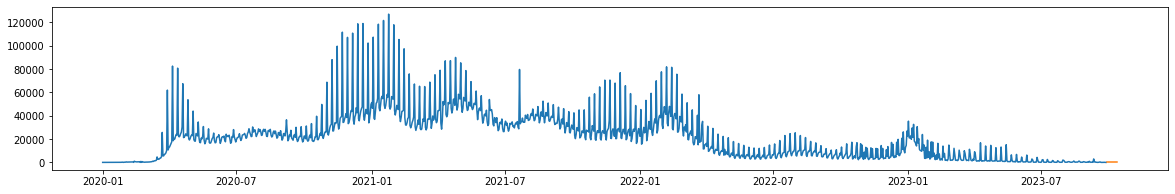

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,3))
ax.plot(df['new_deaths'])
ax.plot(prediction.forecast)